In [1]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

In [2]:
# Import df
dataset = pd.read_csv('Kuesioner Pengaruh Drama_Movie pada Perilaku Sehari-hari (Jawaban) - Form Responses 2.csv')
print(dataset)
df = pd.DataFrame(dataset)

               Timestamp        Nama/Inisial Jenis Kelamin  Umur (cth: 20)  \
0    04/10/2023 10:31:42  alif Salichah ayu      Perempuan              19   
1    04/10/2023 10:33:27        Aisah Sabila     Perempuan              20   
2    04/10/2023 10:35:16                Duma     Perempuan              20   
3    04/10/2023 10:35:38                  NK     Perempuan              20   
4    04/10/2023 10:37:34             fadiyah     Perempuan              20   
..                   ...                 ...           ...             ...   
108   06/10/2023 5:21:16               Killa     Perempuan              20   
109  06/10/2023 15:11:31            Seonghwa     Perempuan              24   
110   08/10/2023 7:45:03                  fz     Perempuan              18   
111  10/10/2023 11:48:09             Luxend      Perempuan              20   
112   11/10/2023 0:27:53                  JA     Perempuan              19   

    Status Pekerjaan Apakah Anda sering menonton drama/movie?  

In [3]:
# Mengubah data kolom kategorik menjadi numerik
labelencoder = LabelEncoder()

# Untuk ketiga variabel di bawah, label numerik dimulai dari 0
df['Jenis Kelamin'] = labelencoder.fit_transform(df['Jenis Kelamin']) # Perempuan = 1, Laki-laki = 0
df['Apakah Anda sering menonton drama/movie?'] = labelencoder.fit_transform(df['Apakah Anda sering menonton drama/movie?']) # Ya = 1, Tidak = 0
df['Apakah setelah melihat drama/movie, Anda pernah mencoba untuk menirukan perilaku atau kebiasan karakter dalam drama/movie tersebut di kehidupan sehari-hari?'] = labelencoder.fit_transform(df['Apakah setelah melihat drama/movie, Anda pernah mencoba untuk menirukan perilaku atau kebiasan karakter dalam drama/movie tersebut di kehidupan sehari-hari?']) # Ya = 1, Tidak = 0

# Untuk keempat variabel di bawah, label numerik dimulai dari 1
label_columns = [
    'Frekuensi menonton drama/movie per Bulan', # 1-5 kali = 1, 6-10 kali = 2, Lebih dari 10 kali = 3
    'Apakah saat menonton drama/movie, Anda selalu terbawa emosi? (Seperti sedih atau marah)', # Sering = 1, Tidak = 2, Ya = 3
    'Menurut Anda, apakah karakter dan keadaan dalam drama/movie tercerminkan di kehidupan nyata?', # Mungkin = 1, Tidak = 2, Ya = 3
    'Apakah setelah melihat drama/movie, mindset Anda terhadap suatu hal berubah?' # Sering = 1, Tidak = 2, Ya = 3
]
for column in label_columns:
    df[column] = labelencoder.fit_transform(df[column]) + 1

# Untuk variabel output, label numerik dimulai dari 0
df['Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?'] = labelencoder.fit_transform(df['Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?']) # Ya = 1, Tidak = 0

print(df)

               Timestamp        Nama/Inisial  Jenis Kelamin  Umur (cth: 20)  \
0    04/10/2023 10:31:42  alif Salichah ayu               1              19   
1    04/10/2023 10:33:27        Aisah Sabila              1              20   
2    04/10/2023 10:35:16                Duma              1              20   
3    04/10/2023 10:35:38                  NK              1              20   
4    04/10/2023 10:37:34             fadiyah              1              20   
..                   ...                 ...            ...             ...   
108   06/10/2023 5:21:16               Killa              1              20   
109  06/10/2023 15:11:31            Seonghwa              1              24   
110   08/10/2023 7:45:03                  fz              1              18   
111  10/10/2023 11:48:09             Luxend               1              20   
112   11/10/2023 0:27:53                  JA              1              19   

    Status Pekerjaan  Apakah Anda sering menonton d

In [4]:
# Menghapus kolom yang tidak digunakan
df = df.drop(['Apa yang menurut Anda menarik dalam drama/movie?'], axis=1)
df = df.drop(['Timestamp'], axis=1)
df = df.drop(['Nama/Inisial'], axis=1)
df = df.drop(['Status Pekerjaan'], axis=1)

In [5]:
# Mendeteksi Missing Value
for i, column in enumerate(df.columns, start=1):
    missing_values = df[column].isna()
    missing_count = missing_values.sum()
    total_count = len(df)

    print(f"Missing value dari kolom ke-{i}: {missing_count}/{total_count}")

# Output menunjukkan tidak ada missing value dari data yang kami peroleh

Missing value dari kolom ke-1: 0/113
Missing value dari kolom ke-2: 0/113
Missing value dari kolom ke-3: 0/113
Missing value dari kolom ke-4: 0/113
Missing value dari kolom ke-5: 0/113
Missing value dari kolom ke-6: 0/113
Missing value dari kolom ke-7: 0/113
Missing value dari kolom ke-8: 0/113
Missing value dari kolom ke-9: 0/113
Missing value dari kolom ke-10: 0/113
Missing value dari kolom ke-11: 0/113
Missing value dari kolom ke-12: 0/113


In [6]:
# Mendeteksi outlier dengan Z-Score
for column in df.select_dtypes(include=[np.number]).columns:
    z_scores = np.abs(stats.zscore(df[column]))
    outliers = df[(z_scores > 3)]

    if not outliers.empty:
        outlier_values = ', '.join(map(str, outliers[column]))
        print(f'Outliers in {column} : {outlier_values}')

Outliers in Umur (cth: 20) : 11, 27, 28
Outliers in Seberapa sering kamu merasa terinspirasi untuk melakukan tindakan positif setelah menonton drama/movie? : 1, 1


In [7]:
# Outlier yang kami temukan hanya ada pada dua variabel seperti yang telah dijelaskan di atas. Yang mana
# keduanya merupakan variabel yang tidak bisa diubah karena nilai tersebut tampak wajar dalam hasil kuesioner yang kami bagikan
# sehingga tidak ada penanganan untuk outlier yang terdeteksi.

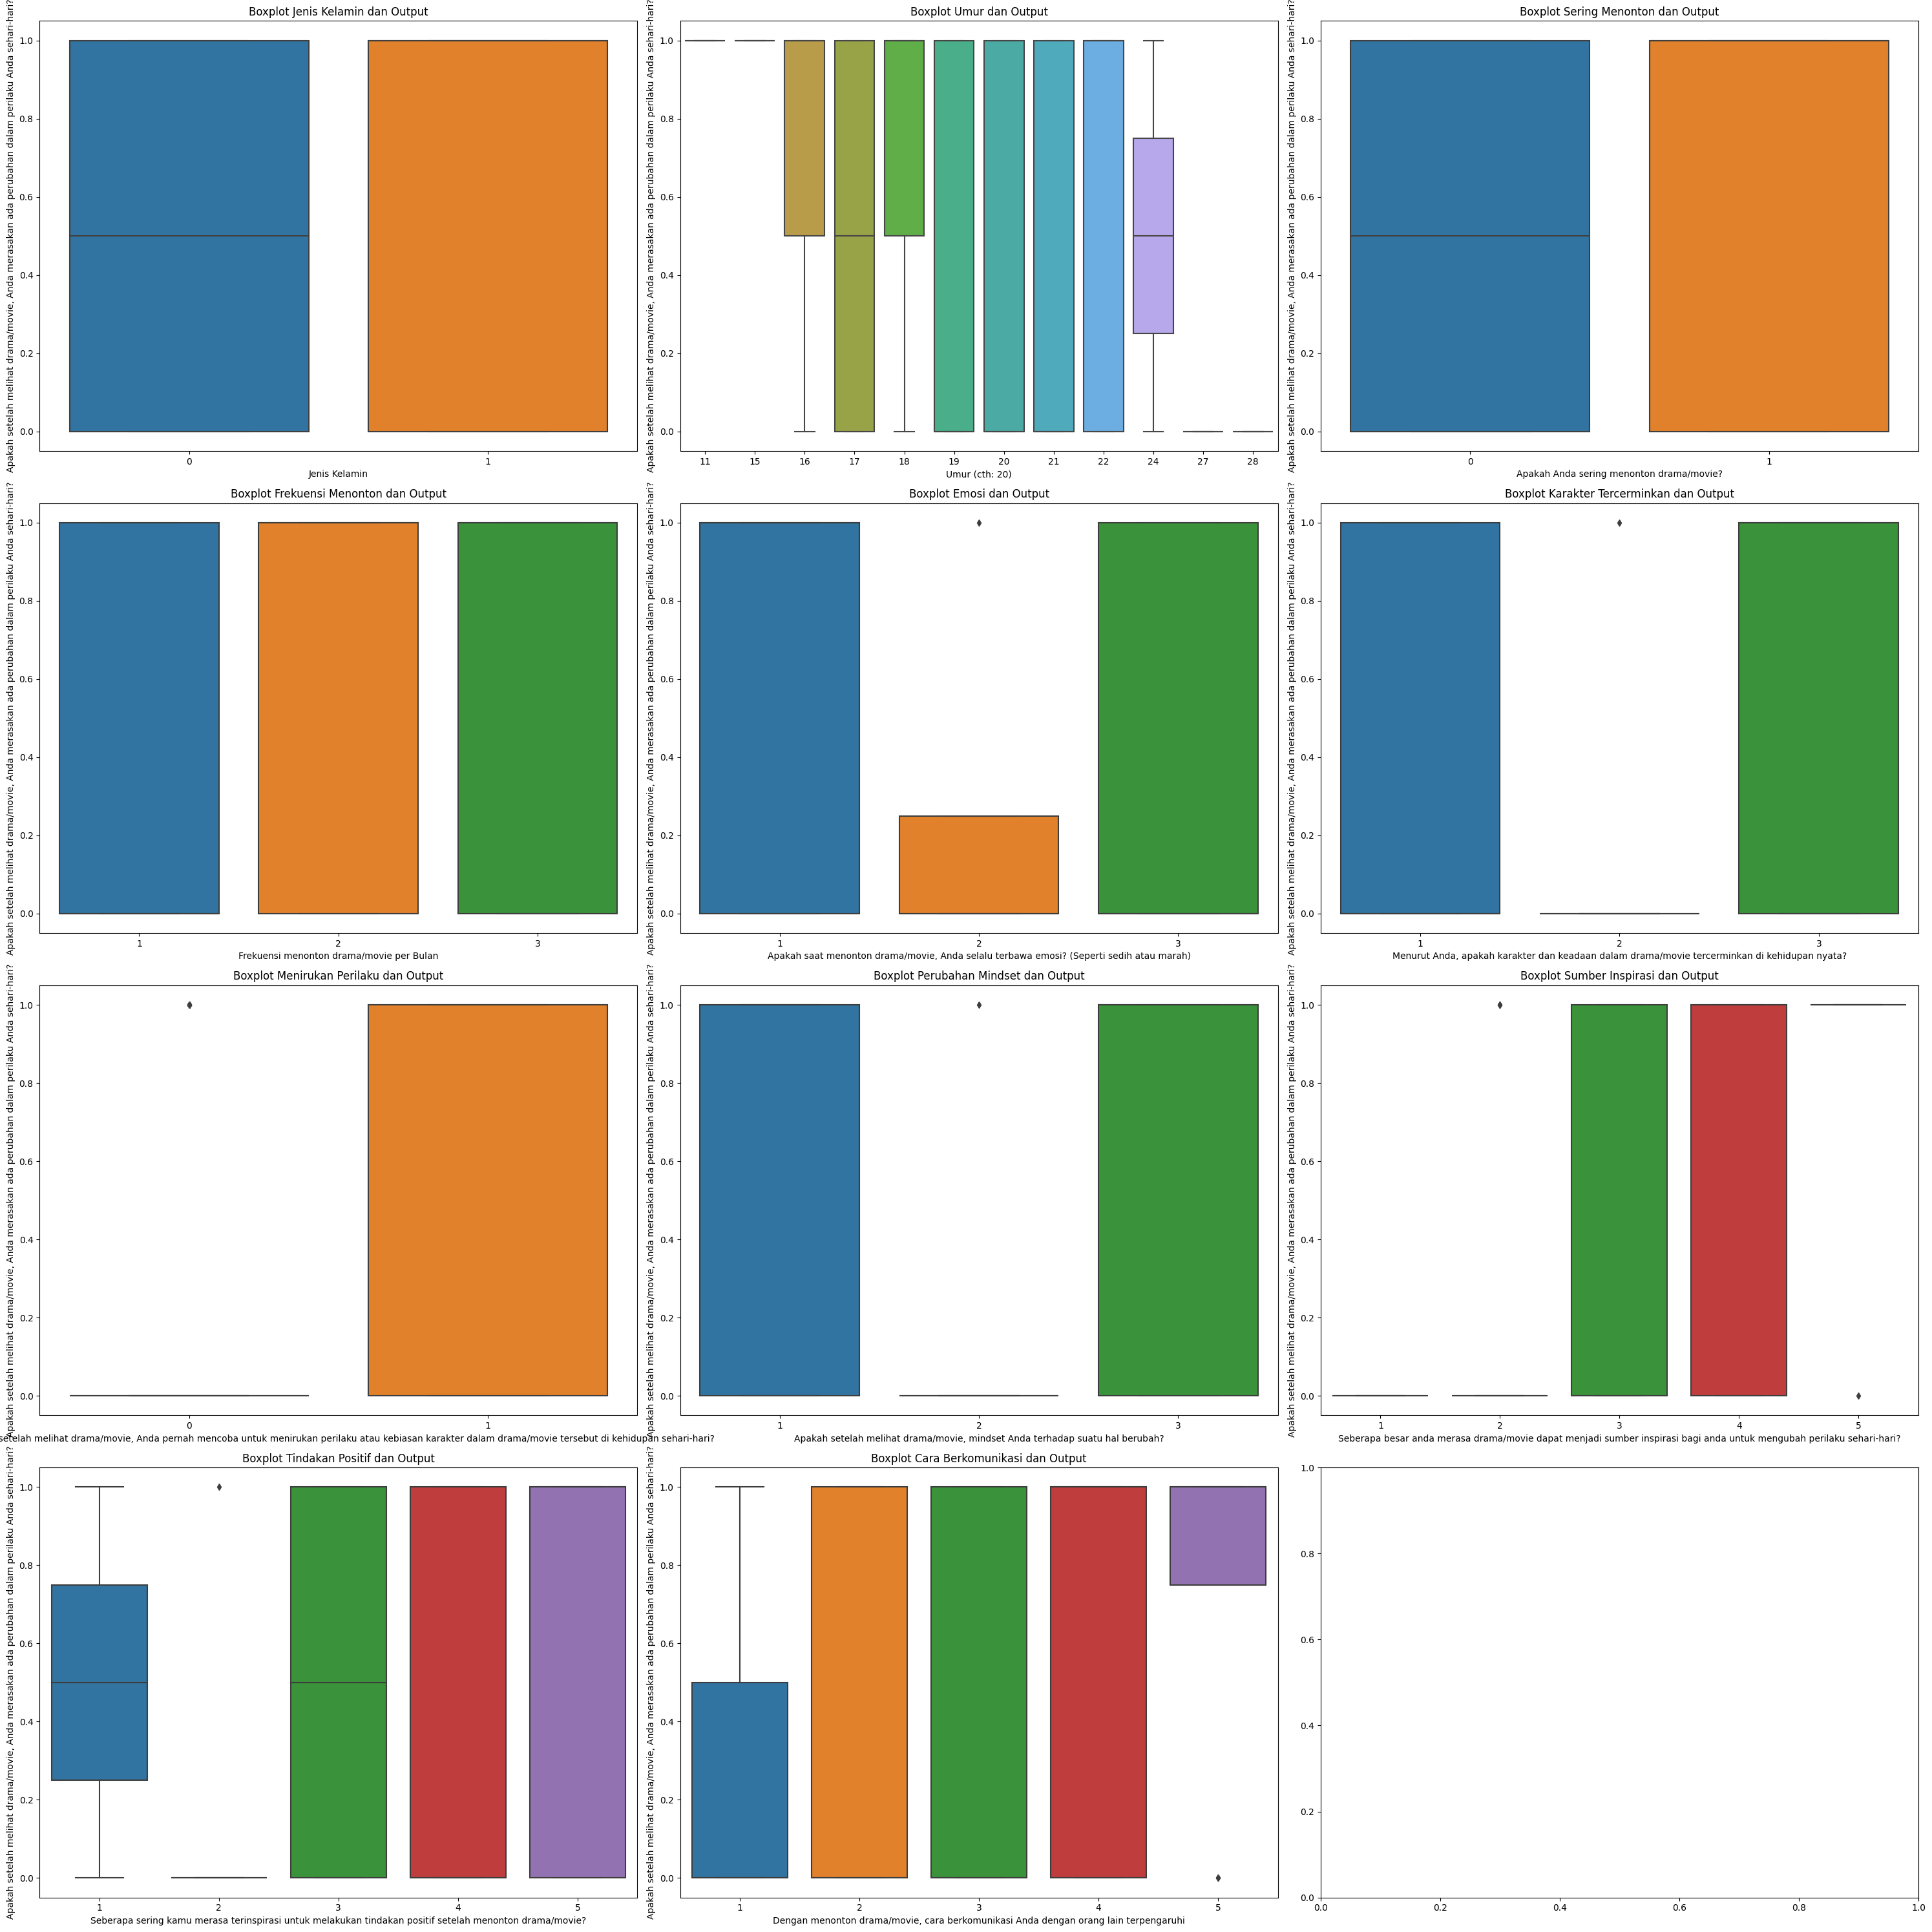

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ukuran gambar untuk boxplot
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(30, 30))

# Boxplot 1
sns.boxplot(x='Jenis Kelamin', y='Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Boxplot Jenis Kelamin dan Output')

# Boxplot 2
sns.boxplot(x='Umur (cth: 20)', y='Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot Umur dan Output')

# Boxplot 3
sns.boxplot(x='Apakah Anda sering menonton drama/movie?', y='Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Boxplot Sering Menonton dan Output')

# Boxplot 4
sns.boxplot(x='Frekuensi menonton drama/movie per Bulan', y='Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Boxplot Frekuensi Menonton dan Output')

# Boxplot 5
sns.boxplot(x='Apakah saat menonton drama/movie, Anda selalu terbawa emosi? (Seperti sedih atau marah)', y='Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Boxplot Emosi dan Output')

# Boxplot 6
sns.boxplot(x='Menurut Anda, apakah karakter dan keadaan dalam drama/movie tercerminkan di kehidupan nyata?', y='Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Boxplot Karakter Tercerminkan dan Output')

# Boxplot 7
sns.boxplot(x='Apakah setelah melihat drama/movie, Anda pernah mencoba untuk menirukan perilaku atau kebiasan karakter dalam drama/movie tersebut di kehidupan sehari-hari?', y='Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Boxplot Menirukan Perilaku dan Output')

# Boxplot 8
sns.boxplot(x='Apakah setelah melihat drama/movie, mindset Anda terhadap suatu hal berubah?', y='Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Boxplot Perubahan Mindset dan Output')

# Boxplot 9
sns.boxplot(x='Seberapa besar anda merasa drama/movie dapat menjadi sumber inspirasi bagi anda untuk mengubah perilaku sehari-hari?', y='Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?', data=df, ax=axes[2, 2])
axes[2, 2].set_title('Boxplot Sumber Inspirasi dan Output')

# Boxplot 10
sns.boxplot(x='Seberapa sering kamu merasa terinspirasi untuk melakukan tindakan positif setelah menonton drama/movie?', y='Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?', data=df, ax=axes[3, 0])
axes[3, 0].set_title('Boxplot Tindakan Positif dan Output')

# Boxplot 11
sns.boxplot(x='Dengan menonton drama/movie, cara berkomunikasi Anda dengan orang lain terpengaruhi', y='Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?', data=df, ax=axes[3, 1])
axes[3, 1].set_title('Boxplot Cara Berkomunikasi dan Output')

# Menyesuaikan layout
plt.tight_layout()

# Menampilkan gambar
plt.show()


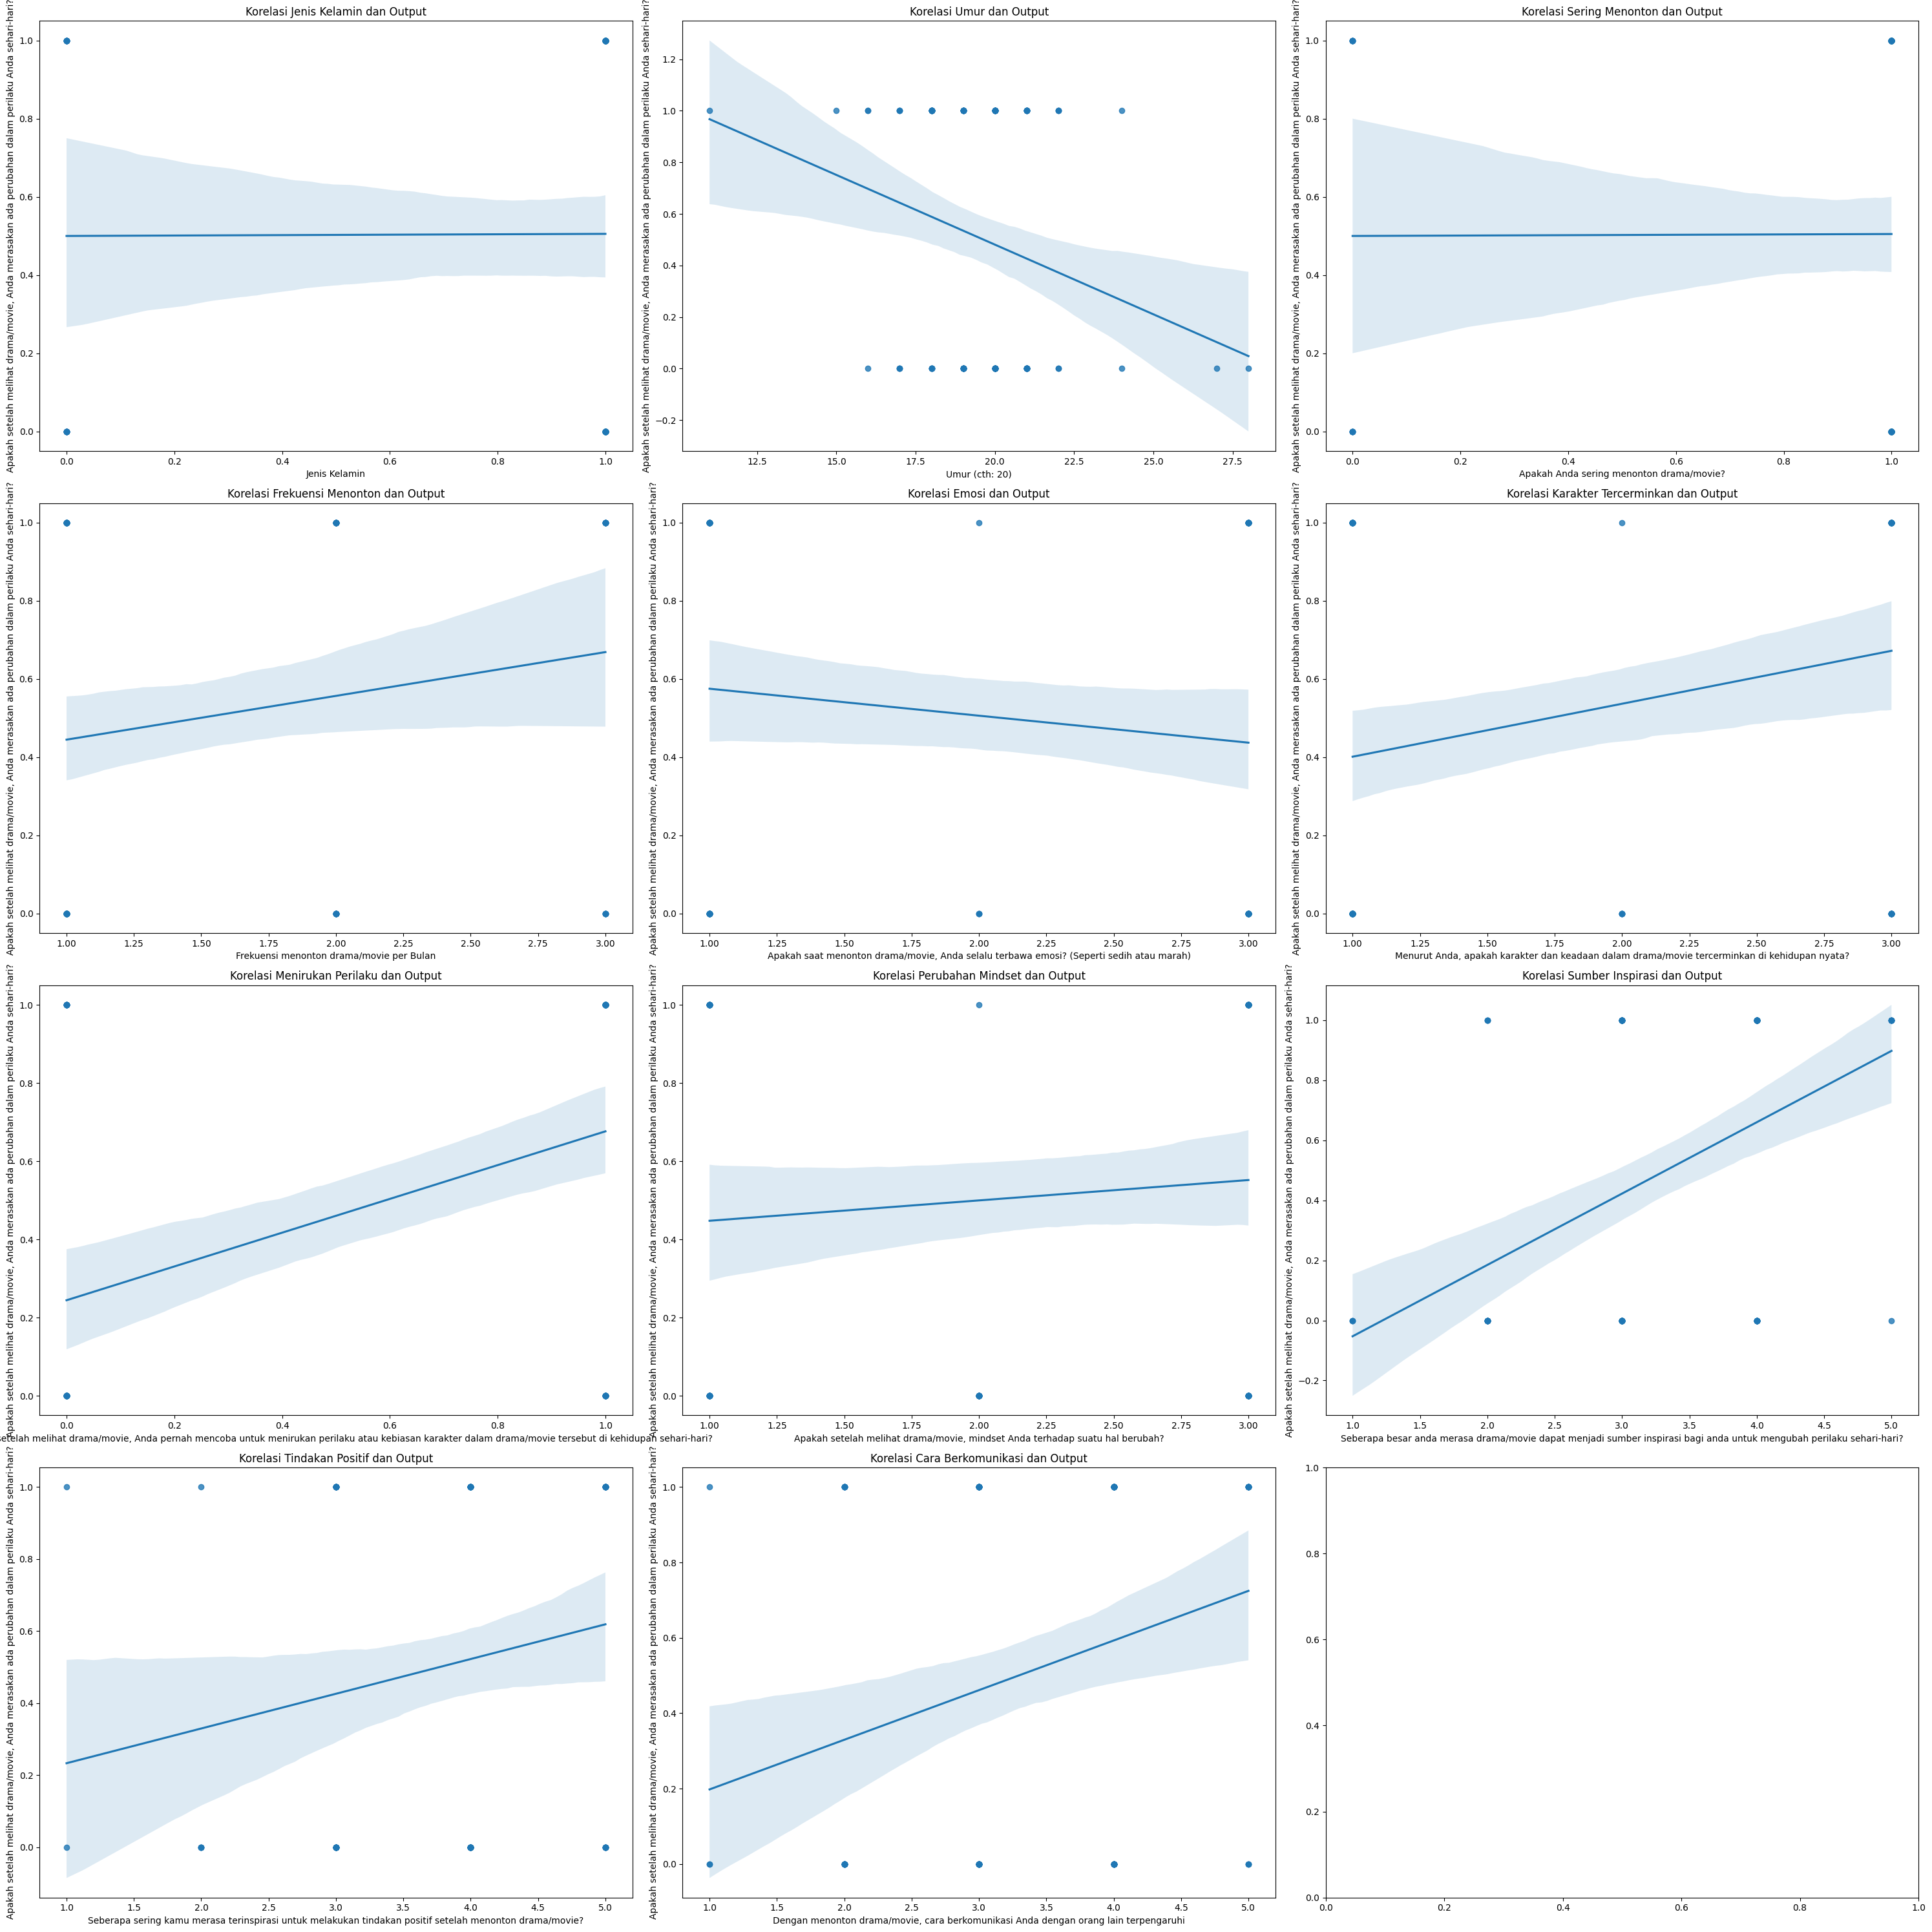

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat korelasi antar variabel output dan input dengan scatter plot dan Heatmap

# Ukuran gambar untuk scatter plots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(30, 30))

# Scatter Plot 1
sns.regplot(x='Jenis Kelamin', y='Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Korelasi Jenis Kelamin dan Output')

# Scatter Plot 2
sns.regplot(x='Umur (cth: 20)', y='Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Korelasi Umur dan Output')

# Scatter Plot 3
sns.regplot(x='Apakah Anda sering menonton drama/movie?', y='Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Korelasi Sering Menonton dan Output')

# Scatter Plot 4
sns.regplot(x='Frekuensi menonton drama/movie per Bulan', y='Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Korelasi Frekuensi Menonton dan Output')

# Scatter Plot 5
sns.regplot(x='Apakah saat menonton drama/movie, Anda selalu terbawa emosi? (Seperti sedih atau marah)', y='Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Korelasi Emosi dan Output')

# Scatter Plot 6
sns.regplot(x='Menurut Anda, apakah karakter dan keadaan dalam drama/movie tercerminkan di kehidupan nyata?', y='Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Korelasi Karakter Tercerminkan dan Output')

# Scatter Plot 7
sns.regplot(x='Apakah setelah melihat drama/movie, Anda pernah mencoba untuk menirukan perilaku atau kebiasan karakter dalam drama/movie tersebut di kehidupan sehari-hari?', y='Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Korelasi Menirukan Perilaku dan Output')

# Scatter Plot 8
sns.regplot(x='Apakah setelah melihat drama/movie, mindset Anda terhadap suatu hal berubah?', y='Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Korelasi Perubahan Mindset dan Output')

# Scatter Plot 9
sns.regplot(x='Seberapa besar anda merasa drama/movie dapat menjadi sumber inspirasi bagi anda untuk mengubah perilaku sehari-hari?', y='Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?', data=df, ax=axes[2, 2])
axes[2, 2].set_title('Korelasi Sumber Inspirasi dan Output')

# Scatter Plot 10
sns.regplot(x='Seberapa sering kamu merasa terinspirasi untuk melakukan tindakan positif setelah menonton drama/movie?', y='Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?', data=df, ax=axes[3, 0])
axes[3, 0].set_title('Korelasi Tindakan Positif dan Output')

# Scatter Plot 11
sns.regplot(x='Dengan menonton drama/movie, cara berkomunikasi Anda dengan orang lain terpengaruhi', y='Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?', data=df, ax=axes[3, 1])
axes[3, 1].set_title('Korelasi Cara Berkomunikasi dan Output')

# Menyesuaikan layout
plt.tight_layout()

# Menampilkan gambar
plt.show()



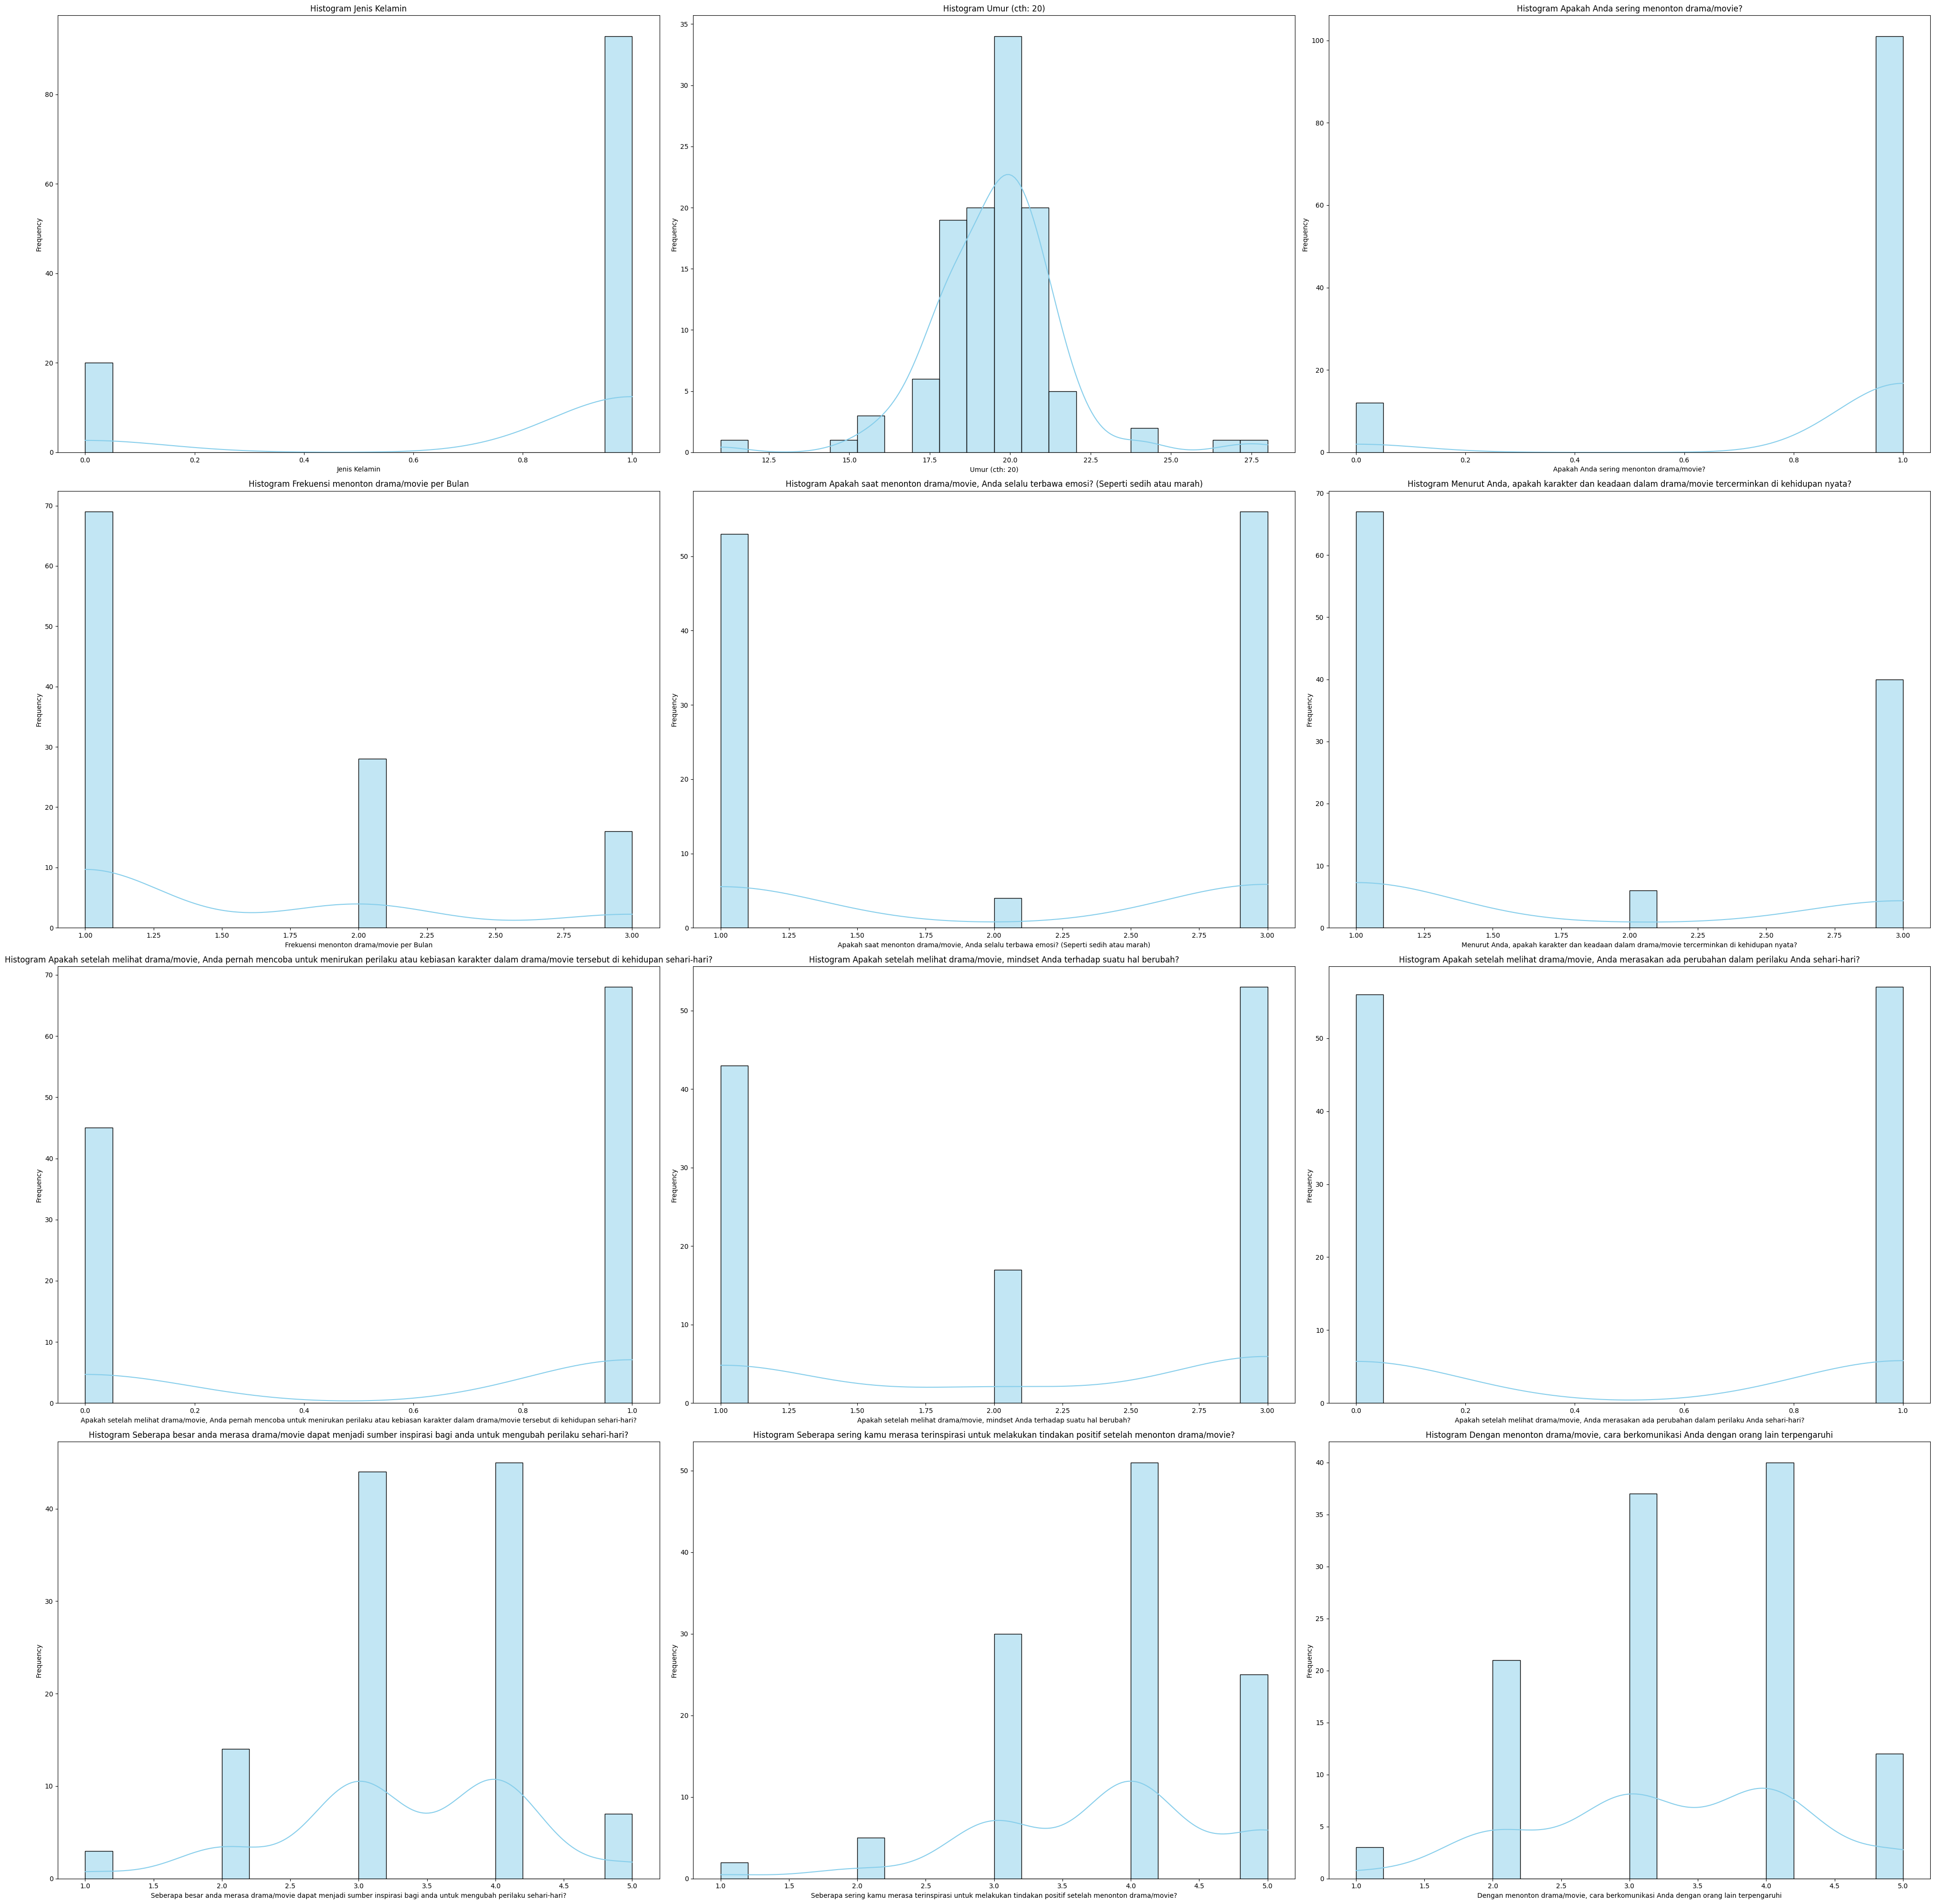

In [10]:
#HISTOGRAM
import matplotlib.pyplot as plt
import seaborn as sns

# Ukuran gambar untuk histogram
plt.figure(figsize=(40, 40))

# Loop untuk membuat histogram untuk setiap variabel numerik
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64', 'int32']).columns):
    plt.subplot(4, 3, i + 1)
    sns.histplot(data=df, x=column, bins=20, kde=True, color='skyblue')
    plt.title(f'Histogram {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Menyesuaikan layout
plt.tight_layout()

# Menampilkan gambar
plt.show()


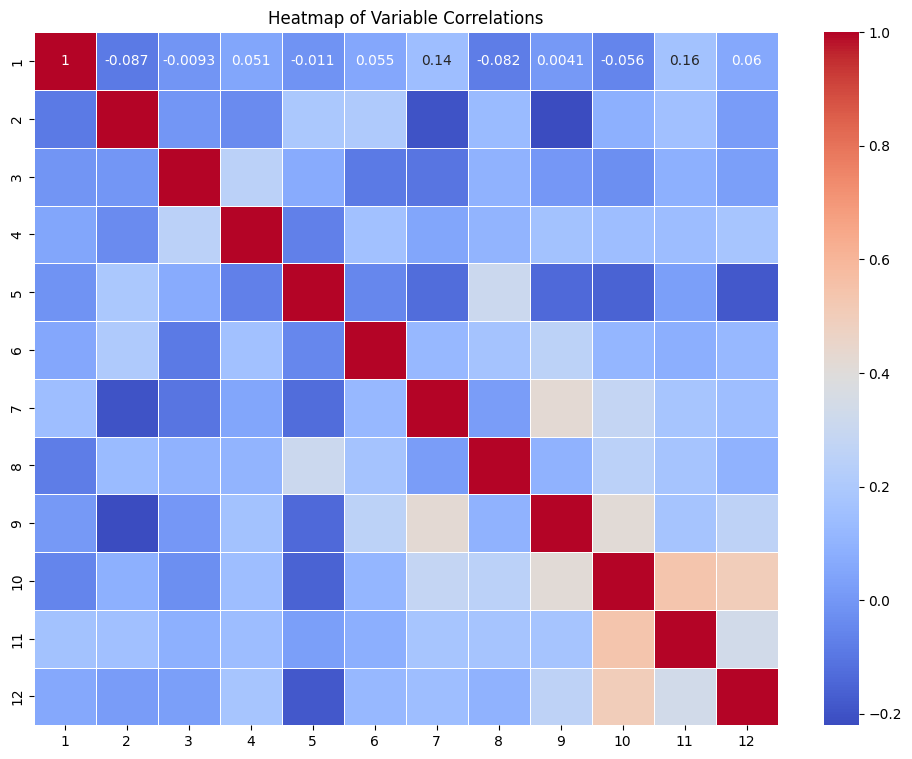

In [26]:
## HEATMAP
# Membuat matriks korelasi antara variabel numerik
correlation_matrix = df.corr()
# Membuat heatmap dari matriks korelasi
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5,
            xticklabels=range(1, len(correlation_matrix.columns) + 1),
            yticklabels=range(1, len(correlation_matrix.columns) + 1))
plt.title('Heatmap of Variable Correlations')
plt.show()

In [12]:
### VISUALISASI DUA DIMENSI ###

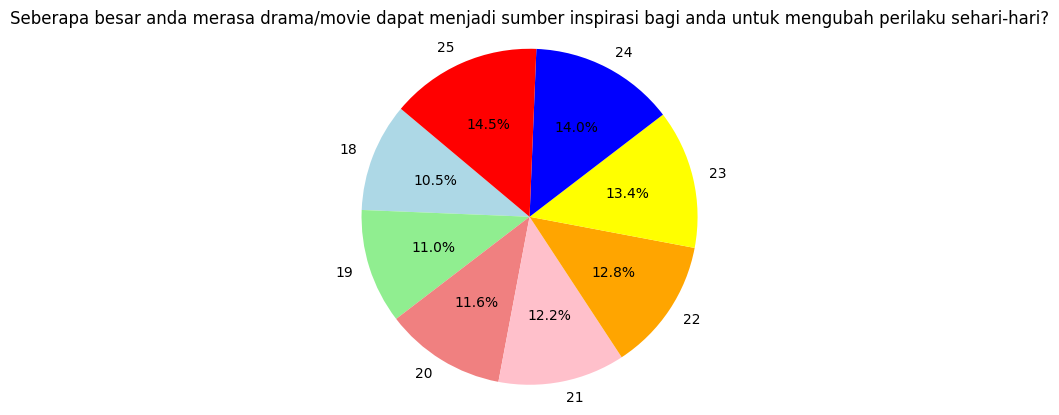

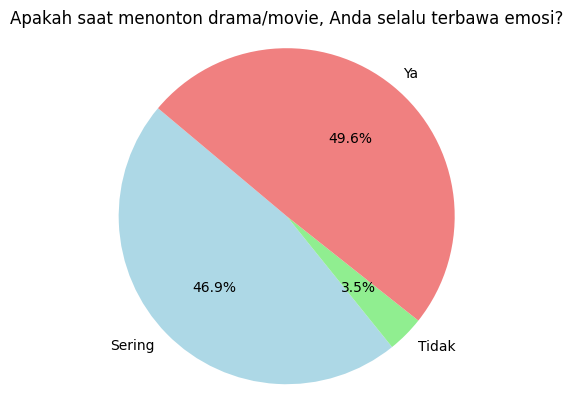

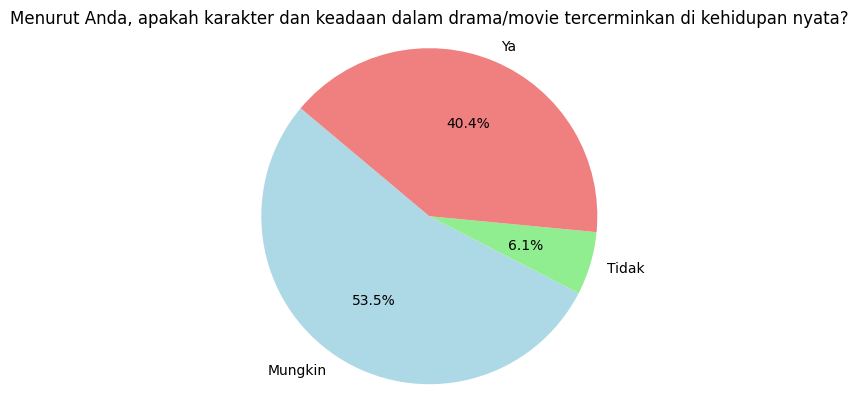

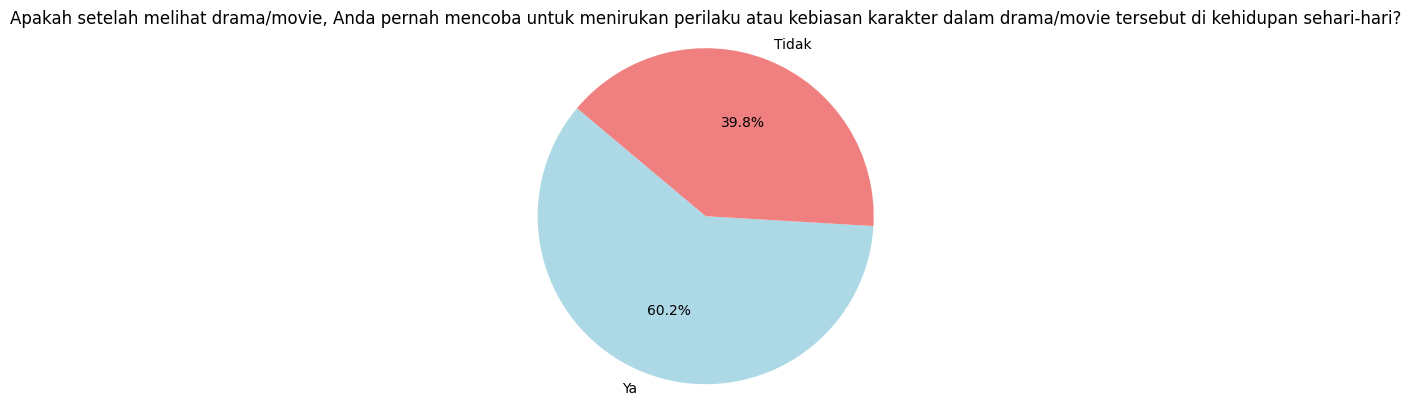

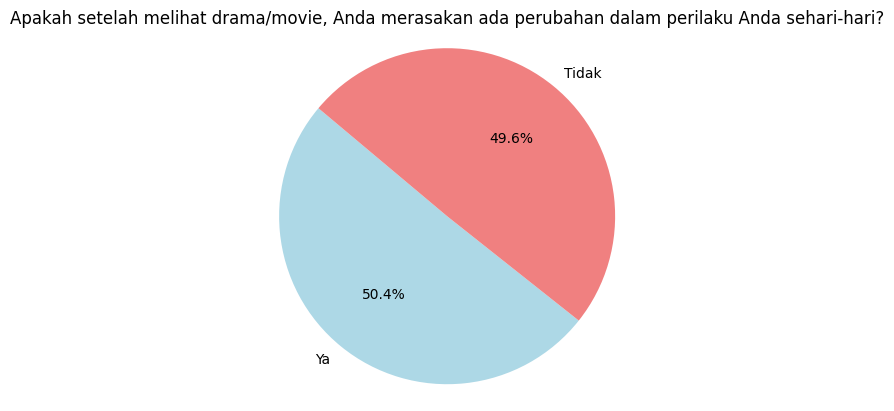

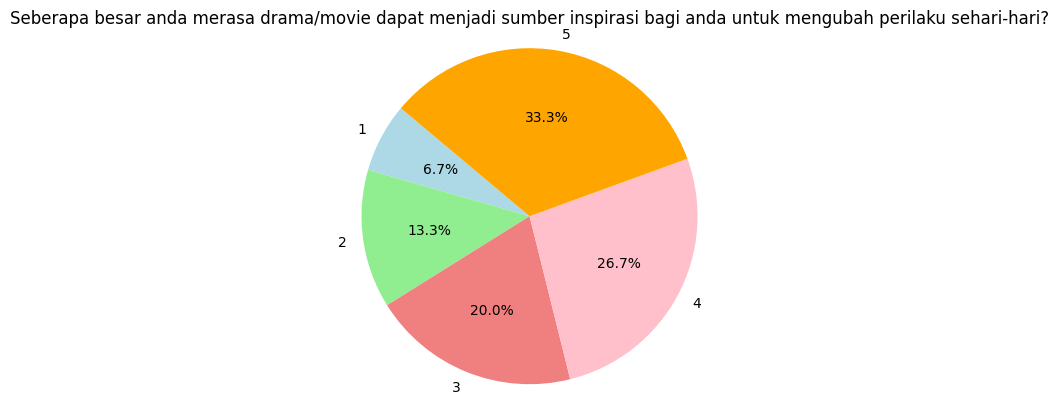

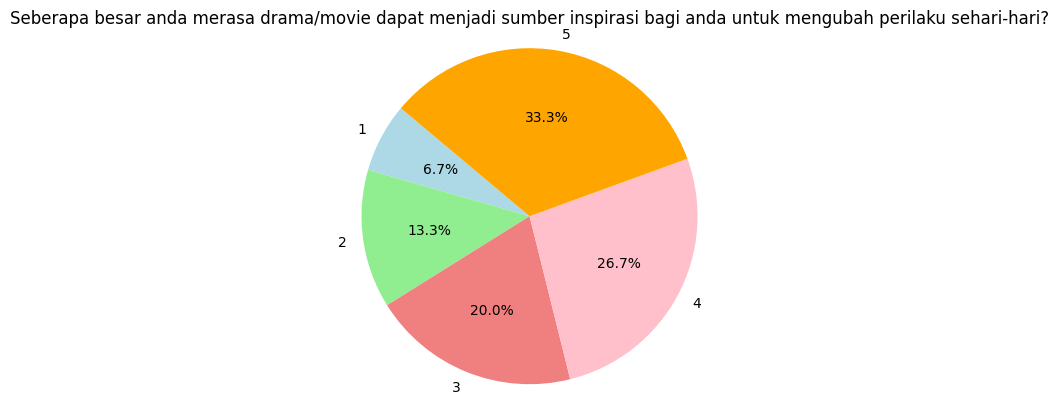

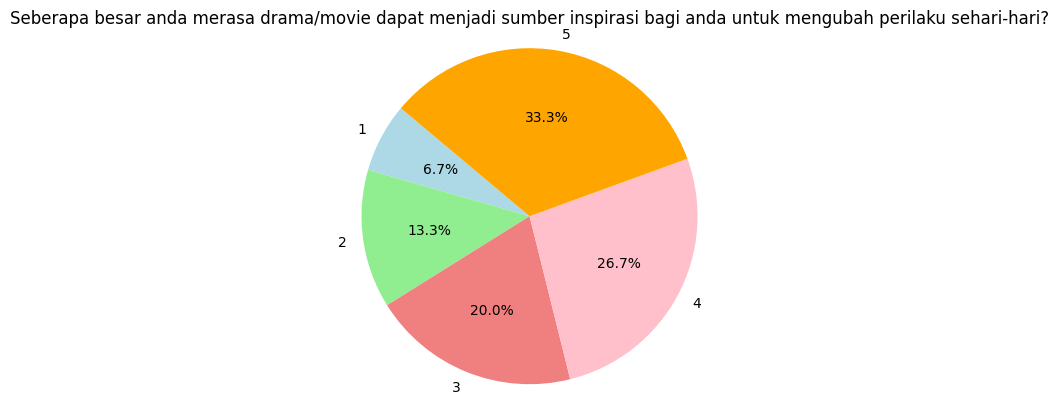

In [13]:
## PIE CHART
# Chart 1 Umur
# Hitung Jenis Kelamin
18 == df[df['Jenis Kelamin'] == 18]
19 == df[df['Jenis Kelamin'] == 19]
20 == df[df['Jenis Kelamin'] == 20]
21 == df[df['Jenis Kelamin'] == 21]
22 == df[df['Jenis Kelamin'] == 22]
23 == df[df['Jenis Kelamin'] == 23]
24 == df[df['Jenis Kelamin'] == 24]
25 == df[df['Jenis Kelamin'] == 25]
# Jumlah total data
total = len(df)
# Jumlah frekuensi menonton
jumlah_18 = 18
jumlah_19 = 19
jumlah_20 = 20
jumlah_21 = 21
jumlah_22 = 22
jumlah_23 = 23
jumlah_24 = 24
jumlah_25 = 25
# Persentase orang yang sering menonton dan yang tidak
persentase_18 = (jumlah_18 / total) * 100
persentase_19 = (jumlah_19 / total) * 100
persentase_20 = (jumlah_20 / total) * 100
persentase_21 = (jumlah_21 / total) * 100
persentase_22 = (jumlah_22 / total) * 100
persentase_23 = (jumlah_23 / total) * 100
persentase_24 = (jumlah_24 / total) * 100
persentase_25 = (jumlah_25 / total) * 100
# Label untuk pie chart
labels = ['18', '19', '20', '21', '22', '23', '24', '25']
# Data untuk pie chart
sizes = [persentase_18, persentase_19, persentase_20, persentase_21, persentase_22, persentase_23, persentase_24, persentase_25]
# Warna potongan pie chart
colors = ['lightblue', 'lightgreen', 'lightcoral', 'pink', 'orange', 'yellow', 'blue', 'red']
# Buat pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Memastikan potongan pie terlihat seimbang
# Tampilkan pie chart
plt.title('Seberapa besar anda merasa drama/movie dapat menjadi sumber inspirasi bagi anda untuk mengubah perilaku sehari-hari?')
plt.show()

# CHART 2 Emosi
# Hitung Apakah saat menonton drama/movie, Anda selalu terbawa emosi? (Seperti sedih atau marah)
Sering = df[df['Apakah saat menonton drama/movie, Anda selalu terbawa emosi? (Seperti sedih atau marah)'] == 1]
Tidak = df[df['Apakah saat menonton drama/movie, Anda selalu terbawa emosi? (Seperti sedih atau marah)'] == 2]
Ya = df[df['Apakah saat menonton drama/movie, Anda selalu terbawa emosi? (Seperti sedih atau marah)'] == 3]
# Jumlah total data
total = len(df)
# Jumlah frekuensi terbawa emosi
jumlah_Sering = len(Sering)
jumlah_Tidak = len(Tidak)
jumlah_Ya = len(Ya)
# Persentase orang yang sering terbawa emosi dan yang tidak
persentase_Sering = (jumlah_Sering / total) * 100
persentase_Tidak = (jumlah_Tidak / total) * 100
persentase_Ya = (jumlah_Ya / total) * 100
# Label untuk pie chart
labels = ['Sering', 'Tidak', 'Ya']
# Data untuk pie chart
sizes = [persentase_Sering, persentase_Tidak, persentase_Ya]
# Warna potongan pie chart
colors = ['lightblue', 'lightgreen', 'lightcoral']
# Buat pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Memastikan potongan pie terlihat seimbang
# Tampilkan pie chart
plt.title('Apakah saat menonton drama/movie, Anda selalu terbawa emosi?')
plt.show()

# CHART 3 Tercerminkan
# Hitung Menurut Anda, apakah karakter dan keadaan dalam drama/movie tercerminkan di kehidupan nyata?
Mungkin = df[df['Menurut Anda, apakah karakter dan keadaan dalam drama/movie tercerminkan di kehidupan nyata?'] == 1]
Tidak = df[df['Menurut Anda, apakah karakter dan keadaan dalam drama/movie tercerminkan di kehidupan nyata?'] == 2]
Ya = df[df['Menurut Anda, apakah karakter dan keadaan dalam drama/movie tercerminkan di kehidupan nyata?'] == 3]
# Jumlah total data
total = len(df)
# Jumlah frekuensi menonton
jumlah_Mungkin = len(Mungkin)
jumlah_Tidak = len(Tidak)
jumlah_Ya = len(Ya)
# Persentase orang yang sering menonton dan yang tidak
persentase_Mungkin = (jumlah_Mungkin / total) * 100
persentase_Tidak = (jumlah_Tidak / total) * 100
persentase_Ya = (jumlah_Ya / total) * 100
# Label untuk pie chart
labels = ['Mungkin', 'Tidak', 'Ya']
# Data untuk pie chart
sizes = [persentase_Sering, persentase_Tidak, persentase_Ya]
# Warna potongan pie chart
colors = ['lightblue', 'lightgreen', 'lightcoral']
# Buat pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Memastikan potongan pie terlihat seimbang
# Tampilkan pie chart
plt.title('Menurut Anda, apakah karakter dan keadaan dalam drama/movie tercerminkan di kehidupan nyata?')
plt.show()

# CHART 4 Menirukan
# Hitung Apakah setelah melihat drama/movie, Anda pernah mencoba untuk menirukan perilaku atau kebiasan karakter dalam drama/movie tersebut di kehidupan sehari-hari?
ya = df[df['Apakah setelah melihat drama/movie, Anda pernah mencoba untuk menirukan perilaku atau kebiasan karakter dalam drama/movie tersebut di kehidupan sehari-hari?'] == 1]
tidak = df[df['Apakah setelah melihat drama/movie, Anda pernah mencoba untuk menirukan perilaku atau kebiasan karakter dalam drama/movie tersebut di kehidupan sehari-hari?'] == 0]
# Jumlah total data
total = len(df)
# Jumlah orang yang sering menonton dan yang tidak
jumlah_ya = len(ya)
jumlah_tidak = len(tidak)
# Persentase orang yang sering menonton dan yang tidak
persentase_ya = (jumlah_ya / total) * 100
persentase_tidak = (jumlah_tidak / total) * 100
# Label untuk pie chart
labels = ['Ya', 'Tidak']
# Data untuk pie chart
sizes = [persentase_ya, persentase_tidak]
# Warna potongan pie chart
colors = ['lightblue', 'lightcoral']
# Buat pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Memastikan potongan pie terlihat seimbang
# Tampilkan pie chart
plt.title('Apakah setelah melihat drama/movie, Anda pernah mencoba untuk menirukan perilaku atau kebiasan karakter dalam drama/movie tersebut di kehidupan sehari-hari?')
plt.show()

# CHART 5 Perubahan perilaku
# Hitung Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?
ya = df[df['Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?'] == 1]
tidak = df[df['Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?'] == 0]
# Jumlah total data
total = len(df)
# Jumlah orang yang sering menonton dan yang tidak
jumlah_ya = len(ya)
jumlah_tidak = len(tidak)
# Persentase orang yang sering menonton dan yang tidak
persentase_ya = (jumlah_ya / total) * 100
persentase_tidak = (jumlah_tidak / total) * 100
# Label untuk pie chart
labels = ['Ya', 'Tidak']
# Data untuk pie chart
sizes = [persentase_ya, persentase_tidak]
# Warna potongan pie chart
colors = ['lightblue', 'lightcoral']
# Buat pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Memastikan potongan pie terlihat seimbang
# Tampilkan pie chart
plt.title('Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?')
plt.show()

# CHART 6 Sumber Inspirasi
# Hitung Seberapa besar anda merasa drama/movie dapat menjadi sumber inspirasi bagi anda untuk mengubah perilaku sehari-hari?
1 == df[df['Seberapa besar anda merasa drama/movie dapat menjadi sumber inspirasi bagi anda untuk mengubah perilaku sehari-hari?'] == 1]
2 == df[df['Seberapa besar anda merasa drama/movie dapat menjadi sumber inspirasi bagi anda untuk mengubah perilaku sehari-hari?'] == 2]
3 == df[df['Seberapa besar anda merasa drama/movie dapat menjadi sumber inspirasi bagi anda untuk mengubah perilaku sehari-hari?'] == 3]
4 == df[df['Seberapa besar anda merasa drama/movie dapat menjadi sumber inspirasi bagi anda untuk mengubah perilaku sehari-hari?'] == 4]
5 == df[df['Seberapa besar anda merasa drama/movie dapat menjadi sumber inspirasi bagi anda untuk mengubah perilaku sehari-hari?'] == 5]
# Jumlah total data
total = len(df)
# Jumlah frekuensi menonton
jumlah_1 = 1
jumlah_2 = 2
jumlah_3 = 3
jumlah_4 = 4
jumlah_5 = 5
# Persentase orang yang sering menonton dan yang tidak
persentase_1 = (jumlah_1 / total) * 100
persentase_2 = (jumlah_2 / total) * 100
persentase_3 = (jumlah_3 / total) * 100
persentase_4 = (jumlah_4 / total) * 100
persentase_5 = (jumlah_5 / total) * 100
# Label untuk pie chart
labels = ['1', '2', '3', '4', '5']
# Data untuk pie chart
sizes = [persentase_1, persentase_2, persentase_3, persentase_4, persentase_5]
# Warna potongan pie chart
colors = ['lightblue', 'lightgreen', 'lightcoral', 'pink', 'orange']
# Buat pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Memastikan potongan pie terlihat seimbang
# Tampilkan pie chart
plt.title('Seberapa besar anda merasa drama/movie dapat menjadi sumber inspirasi bagi anda untuk mengubah perilaku sehari-hari?')
plt.show()

# CHART 7 Tindakan Positif
# Hitung Seberapa sering kamu merasa terinspirasi untuk melakukan tindakan positif setelah menonton drama/movie?
1 == df[df['Seberapa sering kamu merasa terinspirasi untuk melakukan tindakan positif setelah menonton drama/movie?'] == 1]
2 == df[df['Seberapa sering kamu merasa terinspirasi untuk melakukan tindakan positif setelah menonton drama/movie?'] == 2]
3 == df[df['Seberapa sering kamu merasa terinspirasi untuk melakukan tindakan positif setelah menonton drama/movie?'] == 3]
4 == df[df['Seberapa sering kamu merasa terinspirasi untuk melakukan tindakan positif setelah menonton drama/movie?'] == 4]
5 == df[df['Seberapa sering kamu merasa terinspirasi untuk melakukan tindakan positif setelah menonton drama/movie?'] == 5]
# Jumlah total data
total = len(df)
# Jumlah frekuensi menonton
jumlah_1 = 1
jumlah_2 = 2
jumlah_3 = 3
jumlah_4 = 4
jumlah_5 = 5
# Persentase orang yang sering menonton dan yang tidak
persentase_1 = (jumlah_1 / total) * 100
persentase_2 = (jumlah_2 / total) * 100
persentase_3 = (jumlah_3 / total) * 100
persentase_4 = (jumlah_4 / total) * 100
persentase_5 = (jumlah_5 / total) * 100
# Label untuk pie chart
labels = ['1', '2', '3', '4', '5']
# Data untuk pie chart
sizes = [persentase_1, persentase_2, persentase_3, persentase_4, persentase_5]
# Warna potongan pie chart
colors = ['lightblue', 'lightgreen', 'lightcoral', 'pink', 'orange']
# Buat pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Memastikan potongan pie terlihat seimbang
# Tampilkan pie chart
plt.title('Seberapa besar anda merasa drama/movie dapat menjadi sumber inspirasi bagi anda untuk mengubah perilaku sehari-hari?')
plt.show()

# CHART 8 Komunikasi
# Hitung Dengan menonton drama/movie, cara berkomunikasi Anda dengan orang lain terpengaruhi
1 == df[df['Dengan menonton drama/movie, cara berkomunikasi Anda dengan orang lain terpengaruhi'] == 1]
2 == df[df['Dengan menonton drama/movie, cara berkomunikasi Anda dengan orang lain terpengaruhi'] == 2]
3 == df[df['Dengan menonton drama/movie, cara berkomunikasi Anda dengan orang lain terpengaruhi'] == 3]
4 == df[df['Dengan menonton drama/movie, cara berkomunikasi Anda dengan orang lain terpengaruhi'] == 4]
5 == df[df['Dengan menonton drama/movie, cara berkomunikasi Anda dengan orang lain terpengaruhi'] == 5]
# Jumlah total data
total = len(df)
# Jumlah frekuensi menonton
jumlah_1 = 1
jumlah_2 = 2
jumlah_3 = 3
jumlah_4 = 4
jumlah_5 = 5
# Persentase orang yang sering menonton dan yang tidak
persentase_1 = (jumlah_1 / total) * 100
persentase_2 = (jumlah_2 / total) * 100
persentase_3 = (jumlah_3 / total) * 100
persentase_4 = (jumlah_4 / total) * 100
persentase_5 = (jumlah_5 / total) * 100
# Label untuk pie chart
labels = ['1', '2', '3', '4', '5']
# Data untuk pie chart
sizes = [persentase_1, persentase_2, persentase_3, persentase_4, persentase_5]
# Warna potongan pie chart
colors = ['lightblue', 'lightgreen', 'lightcoral', 'pink', 'orange']
# Buat pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Memastikan potongan pie terlihat seimbang
# Tampilkan pie chart
plt.title('Seberapa besar anda merasa drama/movie dapat menjadi sumber inspirasi bagi anda untuk mengubah perilaku sehari-hari?')
plt.show()




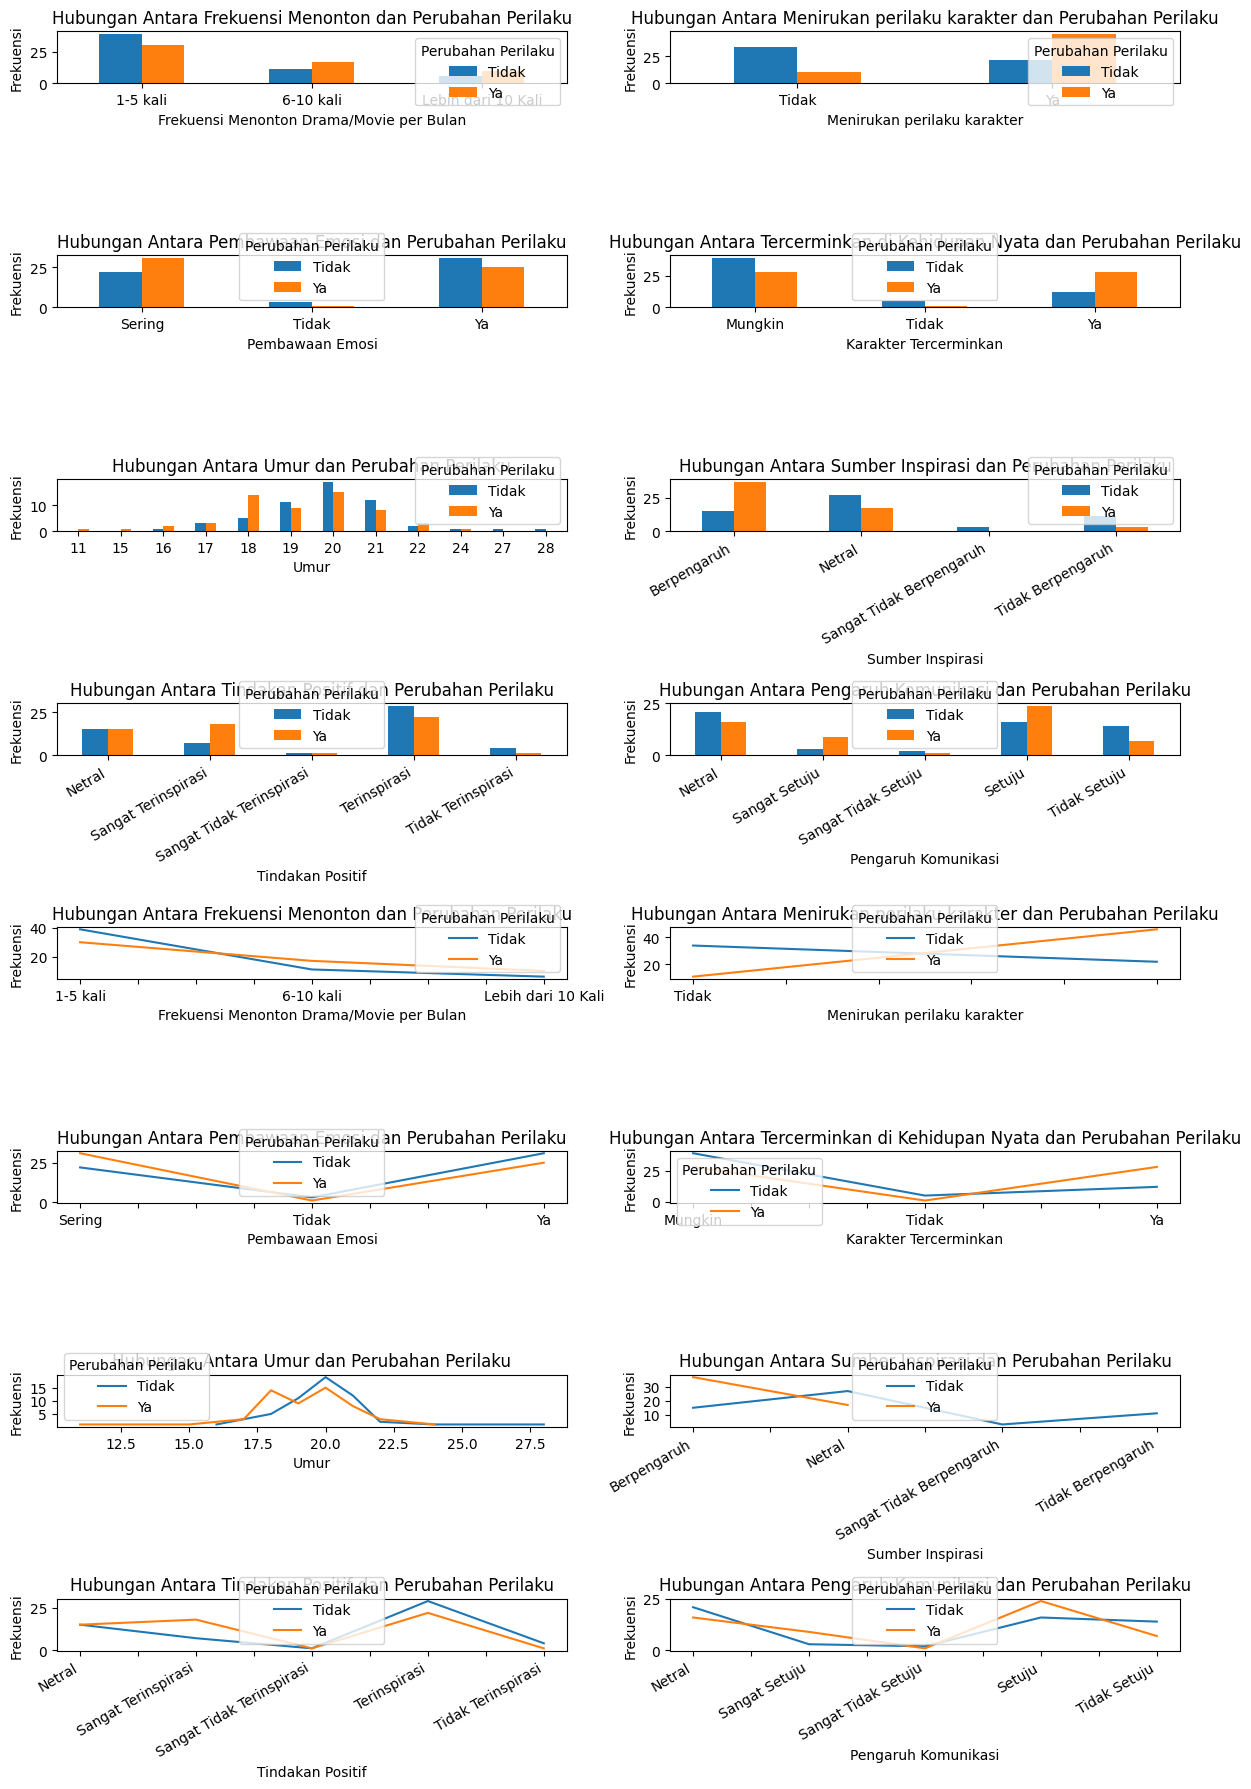

In [14]:
## DIAGRAM BATANG
# Membuat gambar dengan ukuran yang diinginkan
fig, axes = plt.subplots(8, 2, figsize=(12, 18))
# Mengganti label pada tiap variabel
df['Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?'] = df['Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?'].map({0: 'Tidak', 1: 'Ya'})
df['Frekuensi menonton drama/movie per Bulan'] = df['Frekuensi menonton drama/movie per Bulan'].map({
    1: '1-5 kali',
    2: '6-10 kali',
    3: 'Lebih dari 10 Kali'})
df['Apakah setelah melihat drama/movie, Anda pernah mencoba untuk menirukan perilaku atau kebiasan karakter dalam drama/movie tersebut di kehidupan sehari-hari?'] = df['Apakah setelah melihat drama/movie, Anda pernah mencoba untuk menirukan perilaku atau kebiasan karakter dalam drama/movie tersebut di kehidupan sehari-hari?'].map({0: 'Tidak', 1: 'Ya'})
df['Apakah saat menonton drama/movie, Anda selalu terbawa emosi? (Seperti sedih atau marah)'] = df['Apakah saat menonton drama/movie, Anda selalu terbawa emosi? (Seperti sedih atau marah)'].map({
    1: 'Sering',
    2: 'Tidak',
    3: 'Ya'})
df['Menurut Anda, apakah karakter dan keadaan dalam drama/movie tercerminkan di kehidupan nyata?'] = df['Menurut Anda, apakah karakter dan keadaan dalam drama/movie tercerminkan di kehidupan nyata?'].map({
    1: 'Mungkin',
    2: 'Tidak',
    3: 'Ya'})
df['Dengan menonton drama/movie, cara berkomunikasi Anda dengan orang lain terpengaruhi'] = df['Dengan menonton drama/movie, cara berkomunikasi Anda dengan orang lain terpengaruhi'].map({
    1: 'Sangat Tidak Setuju',
    2: 'Tidak Setuju',
    3: 'Netral',
    4: 'Setuju',
    5: 'Sangat Setuju'})
df['Seberapa sering kamu merasa terinspirasi untuk melakukan tindakan positif setelah menonton drama/movie?'] = df['Seberapa sering kamu merasa terinspirasi untuk melakukan tindakan positif setelah menonton drama/movie?'].map({
    1: 'Sangat Tidak Terinspirasi',
    2: 'Tidak Terinspirasi',
    3: 'Netral',
    4: 'Terinspirasi',
    5: 'Sangat Terinspirasi'})
df['Seberapa besar anda merasa drama/movie dapat menjadi sumber inspirasi bagi anda untuk mengubah perilaku sehari-hari?'] = df['Seberapa besar anda merasa drama/movie dapat menjadi sumber inspirasi bagi anda untuk mengubah perilaku sehari-hari?'].map({
    1: 'Sangat Tidak Berpengaruh',
    2: 'Tidak Berpengaruh',
    3: 'Netral',
    4: 'Berpengaruh',
    5: 'Berpengaruh'})

# Diagram 1 (Frekuensi menonton tiap bulan dan Perubahan Perilaku)
data = df.groupby(['Frekuensi menonton drama/movie per Bulan', 'Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?']).size().unstack()
ax = data.plot(kind='bar', ax=axes[0, 0], rot=0)
ax.set_xlabel('Frekuensi Menonton Drama/Movie per Bulan')
ax.set_ylabel('Frekuensi')
ax.set_title('Hubungan Antara Frekuensi Menonton dan Perubahan Perilaku')
# Mengatur ukuran font keterangan
ax.legend(title='Perubahan Perilaku', title_fontsize='10', fontsize='10')

# Diagram 2 (Menirukan perilaku dan kebiasaan dan Perubahan Perilaku)
data = df.groupby(['Apakah setelah melihat drama/movie, Anda pernah mencoba untuk menirukan perilaku atau kebiasan karakter dalam drama/movie tersebut di kehidupan sehari-hari?', 'Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?']).size().unstack()
ax = data.plot(kind='bar', ax=axes[0, 1], rot=0)
ax.set_xlabel('Menirukan perilaku karakter')
ax.set_ylabel('Frekuensi')
ax.set_title('Hubungan Antara Menirukan perilaku karakter dan Perubahan Perilaku')
# Mengatur ukuran font keterangan
ax.legend(title='Perubahan Perilaku', title_fontsize='10', fontsize='10')

# Diagram 3 (Pembawaan Emosi dan Perubahan Perilaku)
data = df.groupby(['Apakah saat menonton drama/movie, Anda selalu terbawa emosi? (Seperti sedih atau marah)', 'Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?']).size().unstack()
ax = data.plot(kind='bar', ax=axes[1, 0], rot=0)
ax.set_xlabel('Pembawaan Emosi')
ax.set_ylabel('Frekuensi')
ax.set_title('Hubungan Antara Pembawaan Emosi dan Perubahan Perilaku')
# Mengatur ukuran font keterangan
ax.legend(title='Perubahan Perilaku', title_fontsize='10', fontsize='10')

# Diagram 4 (Karakter Tercerminkan dan Perubahan Perilaku)
data = df.groupby(['Menurut Anda, apakah karakter dan keadaan dalam drama/movie tercerminkan di kehidupan nyata?', 'Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?']).size().unstack()
ax = data.plot(kind='bar', ax=axes[1, 1], rot=0)
ax.set_xlabel('Karakter Tercerminkan')
ax.set_ylabel('Frekuensi')
ax.set_title('Hubungan Antara Tercerminkan di Kehidupan Nyata dan Perubahan Perilaku')
# Mengatur ukuran font keterangan
ax.legend(title='Perubahan Perilaku', title_fontsize='10', fontsize='10')

# Diagram 5 (Umur dan Perubahan Perilaku)
data = df.groupby(['Umur (cth: 20)', 'Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?']).size().unstack()
ax = data.plot(kind='bar', ax=axes[2, 0], rot=0)
ax.set_xlabel('Umur')
ax.set_ylabel('Frekuensi')
ax.set_title('Hubungan Antara Umur dan Perubahan Perilaku')
# Mengatur ukuran font keterangan
ax.legend(title='Perubahan Perilaku', title_fontsize='10', fontsize='10')

# Diagram 6 (Sumber Inspirasi dan Perubahan Perilaku)
data = df.groupby(['Seberapa besar anda merasa drama/movie dapat menjadi sumber inspirasi bagi anda untuk mengubah perilaku sehari-hari?', 'Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?']).size().unstack()
ax = data.plot(kind='bar', ax=axes[2, 1], rot=0)
ax.set_xlabel('Sumber Inspirasi')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_ylabel('Frekuensi')
ax.set_title('Hubungan Antara Sumber Inspirasi dan Perubahan Perilaku')
# Mengatur ukuran font keterangan
ax.legend(title='Perubahan Perilaku', title_fontsize='10', fontsize='10')

# Diagram 7 (Tindakan Positif dan Perubahan Perilaku)
data = df.groupby(['Seberapa sering kamu merasa terinspirasi untuk melakukan tindakan positif setelah menonton drama/movie?', 'Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?']).size().unstack()
ax = data.plot(kind='bar', ax=axes[3, 0], rot=0)
ax.set_xlabel('Tindakan Positif')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_ylabel('Frekuensi')
ax.set_title('Hubungan Antara Tindakan Positif dan Perubahan Perilaku')
# Mengatur ukuran font keterangan
ax.legend(title='Perubahan Perilaku', title_fontsize='10', fontsize='10')

# Diagram 8 (Pengaruh Komunikasi dan Perubahan Perilaku)
data = df.groupby(['Dengan menonton drama/movie, cara berkomunikasi Anda dengan orang lain terpengaruhi', 'Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?']).size().unstack()
ax = data.plot(kind='bar', ax=axes[3, 1], rot=0)
ax.set_xlabel('Pengaruh Komunikasi')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_ylabel('Frekuensi')
ax.set_title('Hubungan Antara Pengaruh Komunikasi dan Perubahan Perilaku')
# Mengatur ukuran font keterangan
ax.legend(title='Perubahan Perilaku', title_fontsize='10', fontsize='10')


## DIAGRAM GARIS
# Diagram 1 (Frekuensi menonton tiap bulan dan Perubahan Perilaku)
data = df.groupby(['Frekuensi menonton drama/movie per Bulan', 'Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?']).size().unstack()
ax = data.plot(kind='line', ax=axes[4, 0], rot=0)
ax.set_xlabel('Frekuensi Menonton Drama/Movie per Bulan')
ax.set_ylabel('Frekuensi')
ax.set_title('Hubungan Antara Frekuensi Menonton dan Perubahan Perilaku')
# Mengatur ukuran font keterangan
ax.legend(title='Perubahan Perilaku', title_fontsize='10', fontsize='10')

# Diagram 2 (Menirukan perilaku dan kebiasaan dan Perubahan Perilaku)
data = df.groupby(['Apakah setelah melihat drama/movie, Anda pernah mencoba untuk menirukan perilaku atau kebiasan karakter dalam drama/movie tersebut di kehidupan sehari-hari?', 'Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?']).size().unstack()
ax = data.plot(kind='line', ax=axes[4, 1], rot=0)
ax.set_xlabel('Menirukan perilaku karakter')
ax.set_ylabel('Frekuensi')
ax.set_title('Hubungan Antara Menirukan perilaku karakter dan Perubahan Perilaku')
# Mengatur ukuran font keterangan
ax.legend(title='Perubahan Perilaku', title_fontsize='10', fontsize='10')

# Diagram 3 (Pembawaan Emosi dan Perubahan Perilaku)
data = df.groupby(['Apakah saat menonton drama/movie, Anda selalu terbawa emosi? (Seperti sedih atau marah)', 'Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?']).size().unstack()
ax = data.plot(kind='line', ax=axes[5, 0], rot=0)
ax.set_xlabel('Pembawaan Emosi')
ax.set_ylabel('Frekuensi')
ax.set_title('Hubungan Antara Pembawaan Emosi dan Perubahan Perilaku')
# Mengatur ukuran font keterangan
ax.legend(title='Perubahan Perilaku', title_fontsize='10', fontsize='10')

# Diagram 4 (Karakter Tercerminkan dan Perubahan Perilaku)
data = df.groupby(['Menurut Anda, apakah karakter dan keadaan dalam drama/movie tercerminkan di kehidupan nyata?', 'Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?']).size().unstack()
ax = data.plot(kind='line', ax=axes[5, 1], rot=0)
ax.set_xlabel('Karakter Tercerminkan')
ax.set_ylabel('Frekuensi')
ax.set_title('Hubungan Antara Tercerminkan di Kehidupan Nyata dan Perubahan Perilaku')
# Mengatur ukuran font keterangan
ax.legend(title='Perubahan Perilaku', title_fontsize='10', fontsize='10')

# Diagram 5 (Umur dan Perubahan Perilaku)
data = df.groupby(['Umur (cth: 20)', 'Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?']).size().unstack()
ax = data.plot(kind='line', ax=axes[6, 0], rot=0)
ax.set_xlabel('Umur')
ax.set_ylabel('Frekuensi')
ax.set_title('Hubungan Antara Umur dan Perubahan Perilaku')
# Mengatur ukuran font keterangan
ax.legend(title='Perubahan Perilaku', title_fontsize='10', fontsize='10')

# Diagram 6 (Sumber Inspirasi dan Perubahan Perilaku)
data = df.groupby(['Seberapa besar anda merasa drama/movie dapat menjadi sumber inspirasi bagi anda untuk mengubah perilaku sehari-hari?', 'Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?']).size().unstack()
ax = data.plot(kind='line', ax=axes[6, 1], rot=0)
ax.set_xlabel('Sumber Inspirasi')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_ylabel('Frekuensi')
ax.set_title('Hubungan Antara Sumber Inspirasi dan Perubahan Perilaku')
# Mengatur ukuran font keterangan
ax.legend(title='Perubahan Perilaku', title_fontsize='10', fontsize='10')

# Diagram 7 (Tindakan Positif dan Perubahan Perilaku)
data = df.groupby(['Seberapa sering kamu merasa terinspirasi untuk melakukan tindakan positif setelah menonton drama/movie?', 'Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?']).size().unstack()
ax = data.plot(kind='line', ax=axes[7, 0], rot=0)
ax.set_xlabel('Tindakan Positif')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_ylabel('Frekuensi')
ax.set_title('Hubungan Antara Tindakan Positif dan Perubahan Perilaku')
# Mengatur ukuran font keterangan
ax.legend(title='Perubahan Perilaku', title_fontsize='10', fontsize='10')

# Diagram 8 (Pengaruh Komunikasi dan Perubahan Perilaku)
data = df.groupby(['Dengan menonton drama/movie, cara berkomunikasi Anda dengan orang lain terpengaruhi', 'Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?']).size().unstack()
ax = data.plot(kind='line', ax=axes[7, 1], rot=0)
ax.set_xlabel('Pengaruh Komunikasi')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_ylabel('Frekuensi')
ax.set_title('Hubungan Antara Pengaruh Komunikasi dan Perubahan Perilaku')
# Mengatur ukuran font keterangan
ax.legend(title='Perubahan Perilaku', title_fontsize='10', fontsize='10')

# Menampilkan semua diagram
plt.tight_layout()
plt.show()

C:\Users\Adisah\AppData\Local\Temp\ipykernel_3744\3327512961.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pairplot_data['Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?'] = pairplot_data['Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?'].map({0: 'Tidak', 1: 'Ya'})


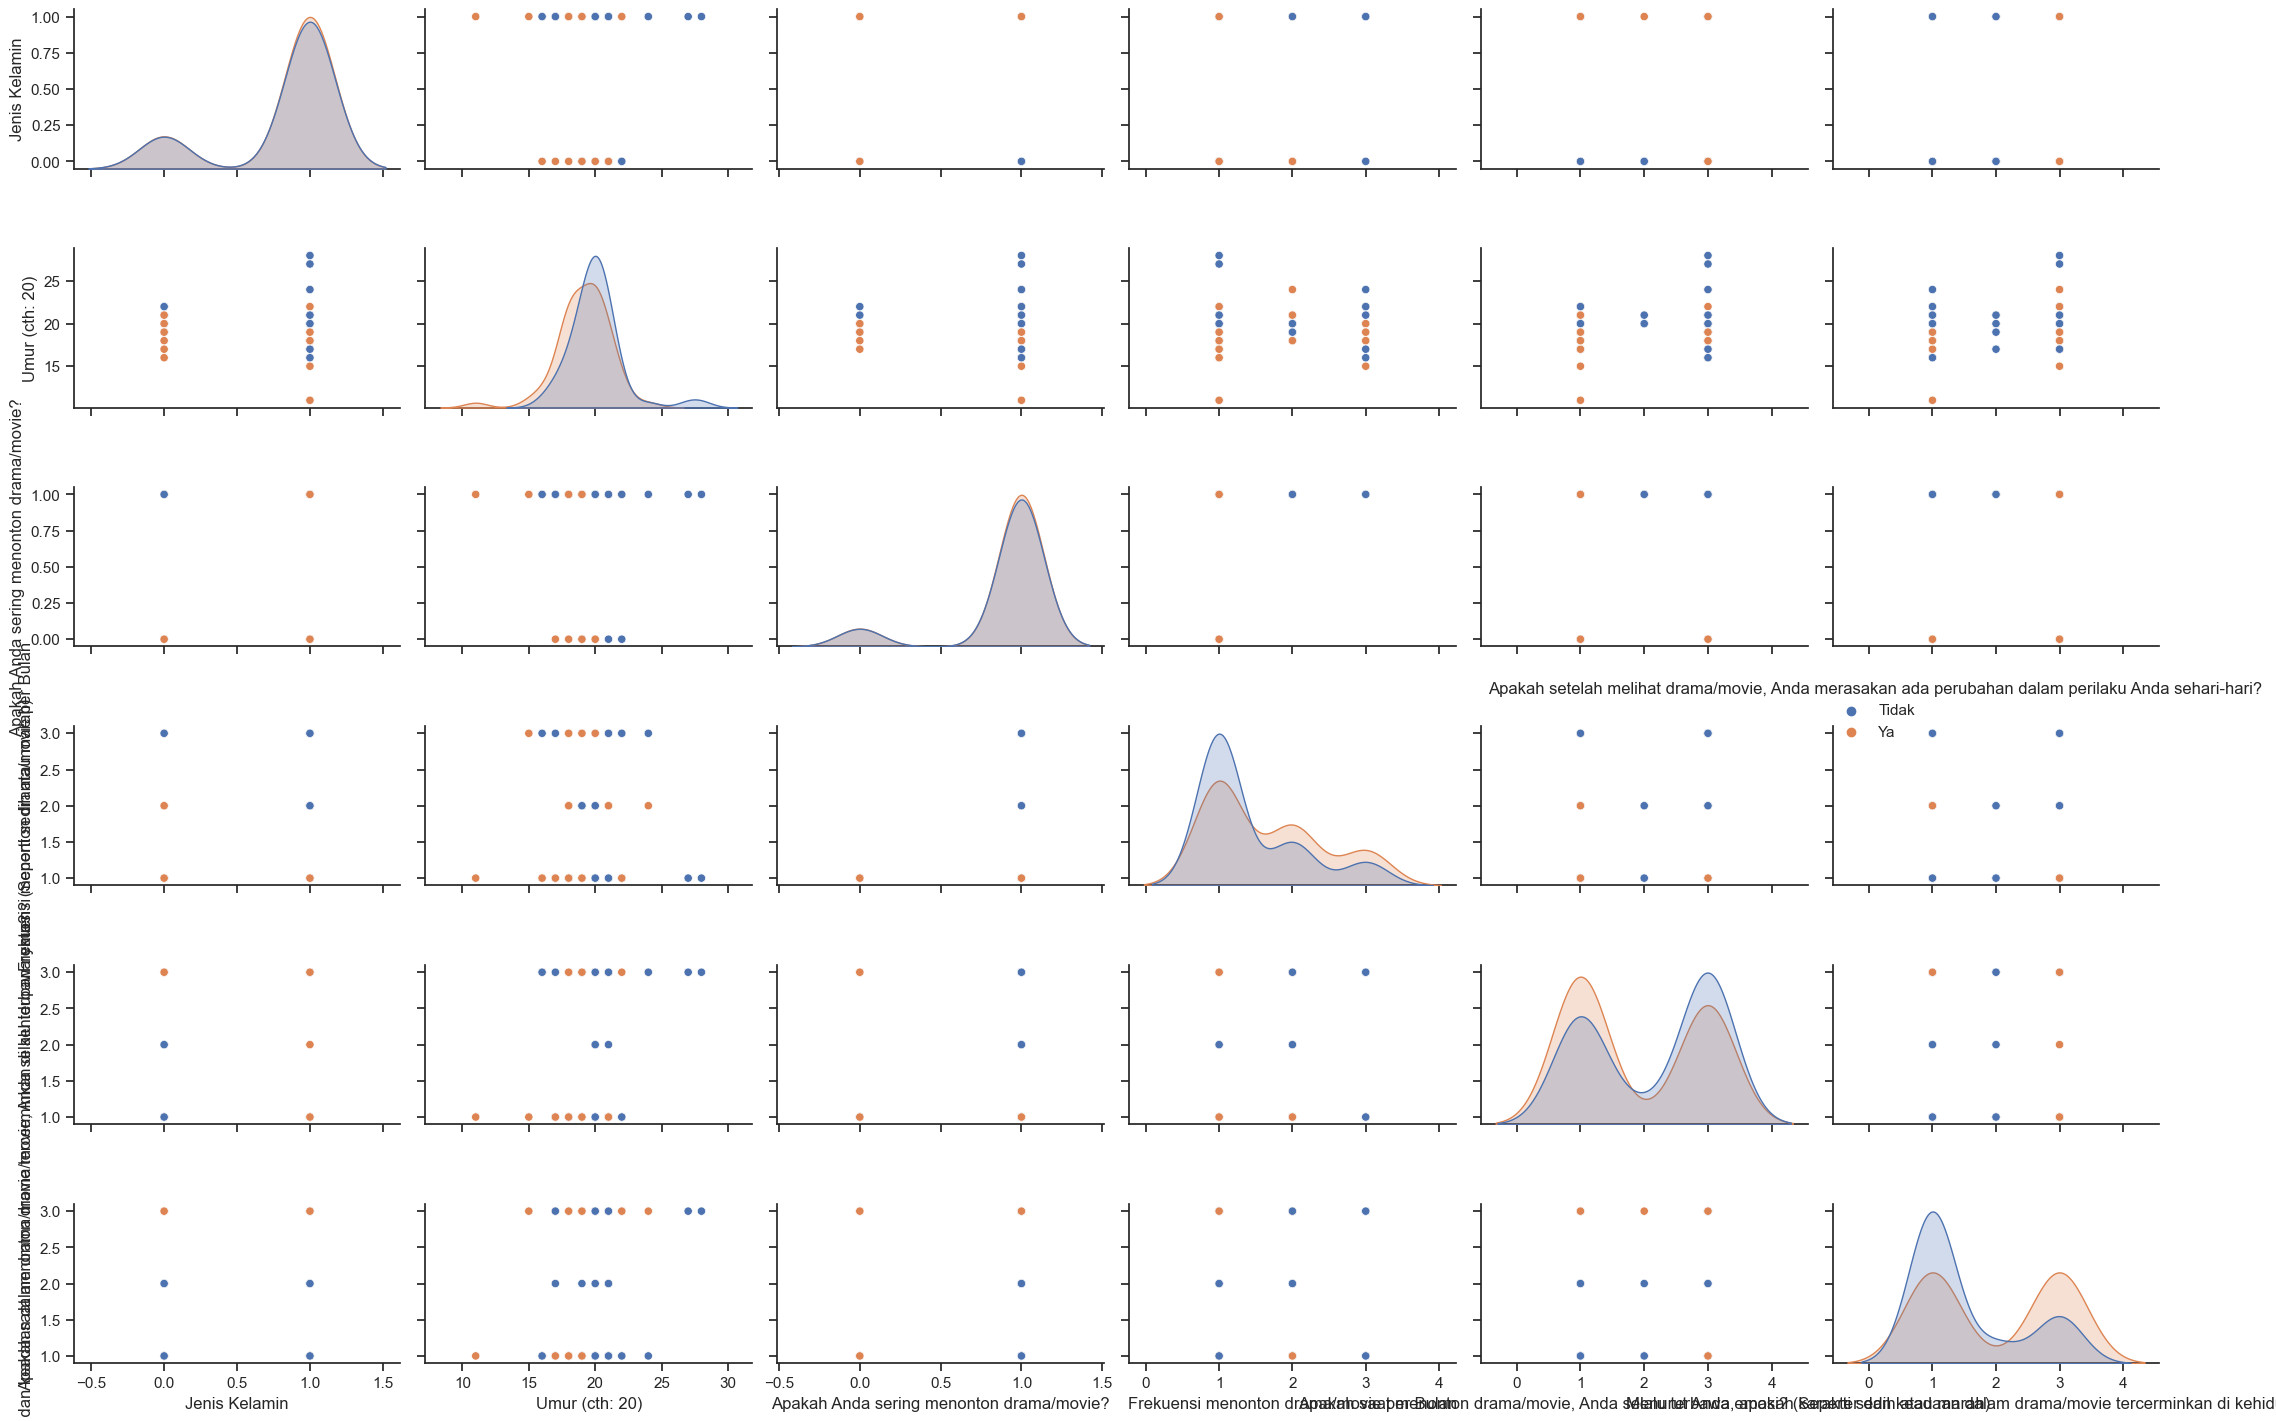

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengambil beberapa kolom numerik untuk pairplot
selected_columns = ['Jenis Kelamin', 'Umur (cth: 20)',
                    'Apakah Anda sering menonton drama/movie?',
                    'Frekuensi menonton drama/movie per Bulan',
                    'Apakah saat menonton drama/movie, Anda selalu terbawa emosi? (Seperti sedih atau marah)',
                    'Menurut Anda, apakah karakter dan keadaan dalam drama/movie tercerminkan di kehidupan nyata?']

# Menggabungkan kolom yang dipilih dengan kolom target
pairplot_data = df[selected_columns + ['Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?']]

# Mapping nilai 0 dan 1 ke "Tidak" dan "Ya"
pairplot_data['Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?'] = pairplot_data['Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?'].map({0: 'Tidak', 1: 'Ya'})

# Membuat pairplot
sns.set(style="ticks")  # Menerapkan gaya ticks untuk memberikan jarak pada label
pairplot = sns.pairplot(pairplot_data, hue='Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?')

# Menyesuaikan jarak pada sumbu y
plt.subplots_adjust(top=0.95, right=0.95, hspace=0.5)

# Menampilkan gambar
plt.show()


In [15]:
### VISUALISASI HIGH DIMENSIONAL ###

C:\Users\Adisah\AppData\Local\Temp\ipykernel_3744\1148331644.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


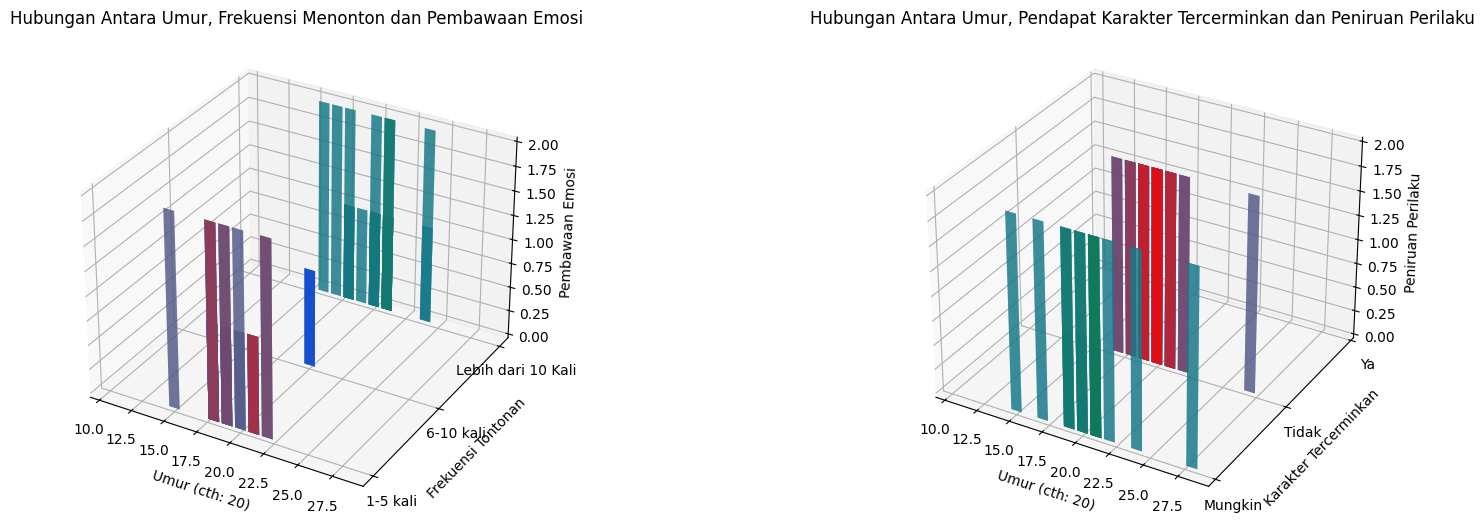

In [16]:
import matplotlib.pyplot as plt

# Diagram 1
x1 = df['Umur (cth: 20)']
y1 = df['Frekuensi menonton drama/movie per Bulan']
z1 = df['Apakah saat menonton drama/movie, Anda selalu terbawa emosi? (Seperti sedih atau marah)'].map({'Sering': 1, 'Tidak': 2, 'Ya': 3})

# Diagram 2
x2 = df['Umur (cth: 20)']
y2 = df['Menurut Anda, apakah karakter dan keadaan dalam drama/movie tercerminkan di kehidupan nyata?']
z2 = df['Apakah setelah melihat drama/movie, Anda pernah mencoba untuk menirukan perilaku atau kebiasan karakter dalam drama/movie tersebut di kehidupan sehari-hari?'].map({'Tidak': 0, 'Ya': 1})

# Membuat gambar dengan ukuran yang diinginkan
fig = plt.figure(figsize=(20, 29))

# Subplot untuk Diagram 1
ax1 = fig.add_subplot(421, projection='3d')
ax1.bar(x1, y1, bottom=0, zs=z1, zdir='y', alpha=0.8)
colors1 = ['r', 'g', 'b']
for i, label in enumerate(z1.unique()):
    ax1.bar(x1[z1 == label], y1[z1 == label], bottom=0, zs=label, zdir='y', color=colors1[i], alpha=0.2, label=label)
ax1.set_xlabel('Umur (cth: 20)')
ax1.set_ylabel('Frekuensi Tontonan')
ax1.set_zlabel('Pembawaan Emosi')
ax1.set_title('Hubungan Antara Umur, Frekuensi Menonton dan Pembawaan Emosi')
yticks1 = [1, 2, 3]
ax1.set_yticks(yticks1)
ax1.set_yticklabels(['1-5 kali', '6-10 kali', 'Lebih dari 10 Kali'])

# Subplot untuk Diagram 2
ax2 = fig.add_subplot(422, projection='3d')
ax2.bar(x2, y2, bottom=0, zs=z2, zdir='y', alpha=0.8)
colors2 = ['r', 'g', 'b']
for i, label in enumerate(z2.unique()):
    ax2.bar(x2[z2 == label], y2[z2 == label], bottom=0, zs=label, zdir='y', color=colors2[i], alpha=0.2, label=label)
ax2.set_xlabel('Umur (cth: 20)')
ax2.set_ylabel('Karakter Tercerminkan')
ax2.set_zlabel('Peniruan Perilaku')
ax2.set_title('Hubungan Antara Umur, Pendapat Karakter Tercerminkan dan Peniruan Perilaku')
yticks2 = [0, 1, 2]
ax2.set_yticks(yticks2)
ax2.set_yticklabels(['Mungkin', 'Tidak', 'Ya'])

# Menyesuaikan layout dan menampilkan gambar
plt.tight_layout()
plt.show()


In [17]:
# Import Data
dataset = pd.read_csv('Kuesioner Pengaruh Drama_Movie pada Perilaku Sehari-hari (Jawaban) - Form Responses 2.csv')
print(dataset)
df = pd.DataFrame(dataset)

# Mengubah data kolom kategorik menjadi numerik
labelencoder = LabelEncoder()

# Untuk ketiga variabel di bawah, label numerik dimulai dari 0
df['Jenis Kelamin'] = labelencoder.fit_transform(df['Jenis Kelamin']) # Perempuan = 1, Laki-laki = 0
df['Apakah Anda sering menonton drama/movie?'] = labelencoder.fit_transform(df['Apakah Anda sering menonton drama/movie?']) # Ya = 1, Tidak = 0
df['Apakah setelah melihat drama/movie, Anda pernah mencoba untuk menirukan perilaku atau kebiasan karakter dalam drama/movie tersebut di kehidupan sehari-hari?'] = labelencoder.fit_transform(df['Apakah setelah melihat drama/movie, Anda pernah mencoba untuk menirukan perilaku atau kebiasan karakter dalam drama/movie tersebut di kehidupan sehari-hari?']) # Ya = 1, Tidak = 0

# Untuk keempat variabel di bawah, label numerik dimulai dari 1
label_columns = [
    'Frekuensi menonton drama/movie per Bulan', # 1-5 kali = 1, 6-10 kali = 2, Lebih dari 10 kali = 3
    'Apakah saat menonton drama/movie, Anda selalu terbawa emosi? (Seperti sedih atau marah)', # Sering = 1, Tidak = 2, Ya = 3
    'Menurut Anda, apakah karakter dan keadaan dalam drama/movie tercerminkan di kehidupan nyata?', # Mungkin = 1, Tidak = 2, Ya = 3
    'Apakah setelah melihat drama/movie, mindset Anda terhadap suatu hal berubah?' # Sering = 1, Tidak = 2, Ya = 3
]
for column in label_columns:
    df[column] = labelencoder.fit_transform(df[column]) + 1

# Untuk variabel output, label numerik dimulai dari 0
df['Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?'] = labelencoder.fit_transform(df['Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?']) # Ya = 1, Tidak = 0

print(df)

# Menghapus kolom yang tidak digunakan
df = df.drop(['Apa yang menurut Anda menarik dalam drama/movie?'], axis=1)
df = df.drop(['Timestamp'], axis=1)
df = df.drop(['Nama/Inisial'], axis=1)
df = df.drop(['Status Pekerjaan'], axis=1)

               Timestamp        Nama/Inisial Jenis Kelamin  Umur (cth: 20)  \
0    04/10/2023 10:31:42  alif Salichah ayu      Perempuan              19   
1    04/10/2023 10:33:27        Aisah Sabila     Perempuan              20   
2    04/10/2023 10:35:16                Duma     Perempuan              20   
3    04/10/2023 10:35:38                  NK     Perempuan              20   
4    04/10/2023 10:37:34             fadiyah     Perempuan              20   
..                   ...                 ...           ...             ...   
108   06/10/2023 5:21:16               Killa     Perempuan              20   
109  06/10/2023 15:11:31            Seonghwa     Perempuan              24   
110   08/10/2023 7:45:03                  fz     Perempuan              18   
111  10/10/2023 11:48:09             Luxend      Perempuan              20   
112   11/10/2023 0:27:53                  JA     Perempuan              19   

    Status Pekerjaan Apakah Anda sering menonton drama/movie?  

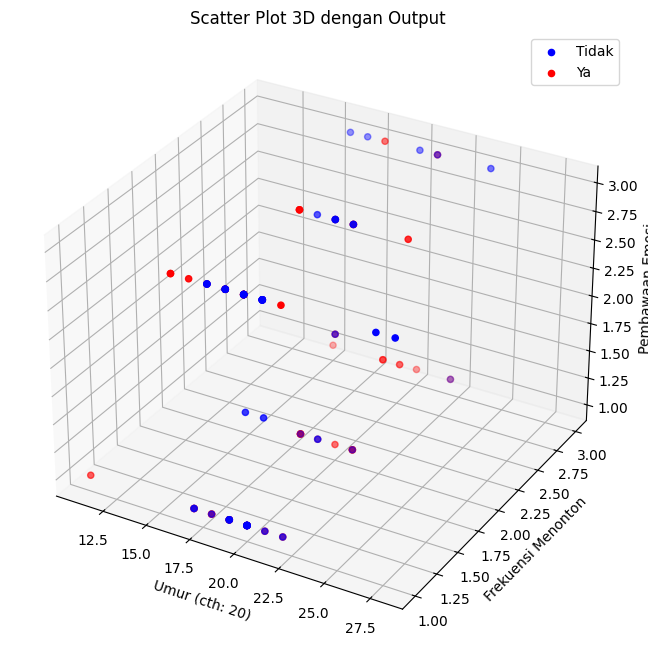

In [18]:
# Memisahkan data berdasarkan output
output_0 = df[df['Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?'] == 0]
output_1 = df[df['Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?'] == 1]

# High Dimensional Scatter Plot 1
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Menampilkan scatter plot untuk Output 0 (warna biru) dan Output 1 (warna merah)
ax.scatter(output_0['Umur (cth: 20)'], output_0['Frekuensi menonton drama/movie per Bulan'], output_0['Apakah saat menonton drama/movie, Anda selalu terbawa emosi? (Seperti sedih atau marah)'], c='blue', label='Tidak')
ax.scatter(output_1['Umur (cth: 20)'], output_1['Frekuensi menonton drama/movie per Bulan'], output_1['Apakah saat menonton drama/movie, Anda selalu terbawa emosi? (Seperti sedih atau marah)'], c='red', label='Ya')

ax.set_xlabel('Umur (cth: 20)')
ax.set_ylabel('Frekuensi Menonton')
ax.set_zlabel('Pembawaan Emosi')
ax.set_title('Scatter Plot 3D dengan Output')

plt.legend()
plt.show()

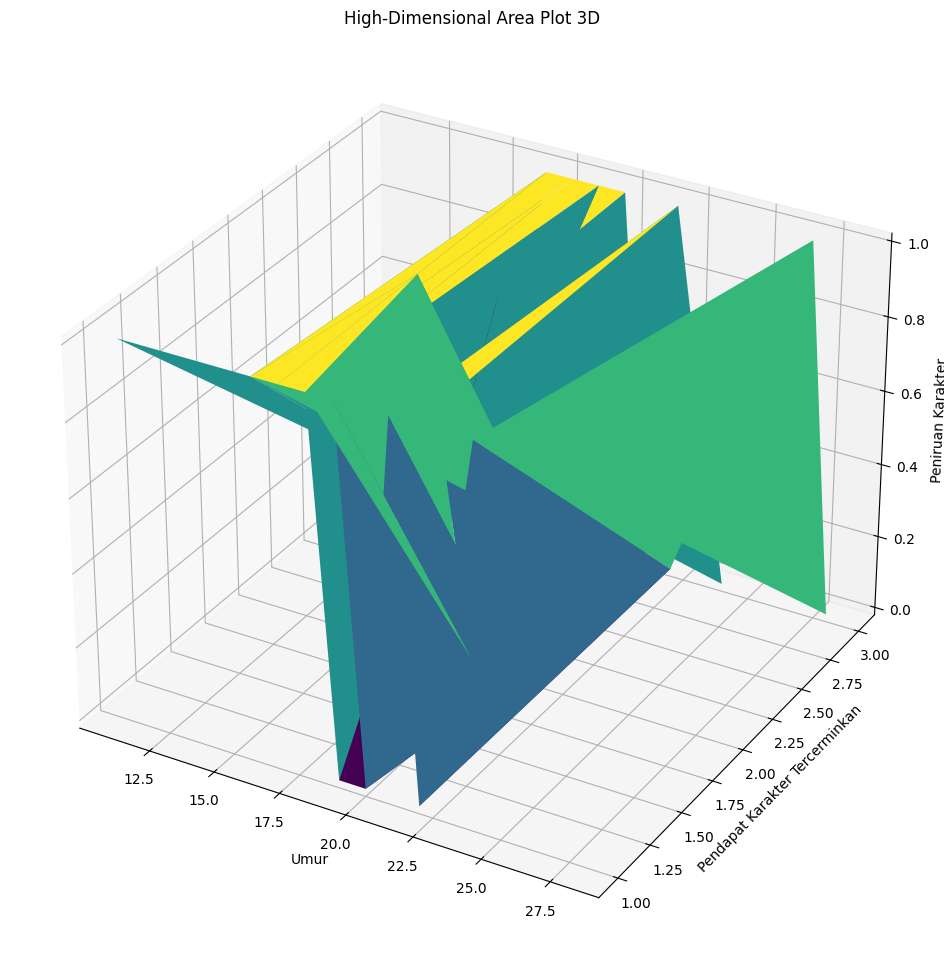

In [19]:
# High Dimensional Area Plot 2
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
# Membuat surface plot
surf_0 = ax.plot_trisurf(output_0['Umur (cth: 20)'], output_0['Menurut Anda, apakah karakter dan keadaan dalam drama/movie tercerminkan di kehidupan nyata?'], output_0['Apakah setelah melihat drama/movie, Anda pernah mencoba untuk menirukan perilaku atau kebiasan karakter dalam drama/movie tersebut di kehidupan sehari-hari?'], cmap='viridis')
surf_1 = ax.plot_trisurf(output_1['Umur (cth: 20)'], output_1['Menurut Anda, apakah karakter dan keadaan dalam drama/movie tercerminkan di kehidupan nyata?'], output_1['Apakah setelah melihat drama/movie, Anda pernah mencoba untuk menirukan perilaku atau kebiasan karakter dalam drama/movie tersebut di kehidupan sehari-hari?'], cmap='viridis')
# Menambahkan label
ax.set_xlabel('Umur')
ax.set_ylabel('Pendapat Karakter Tercerminkan')
ax.set_zlabel('Peniruan Karakter')
ax.set_title('High-Dimensional Area Plot 3D')
plt.show()

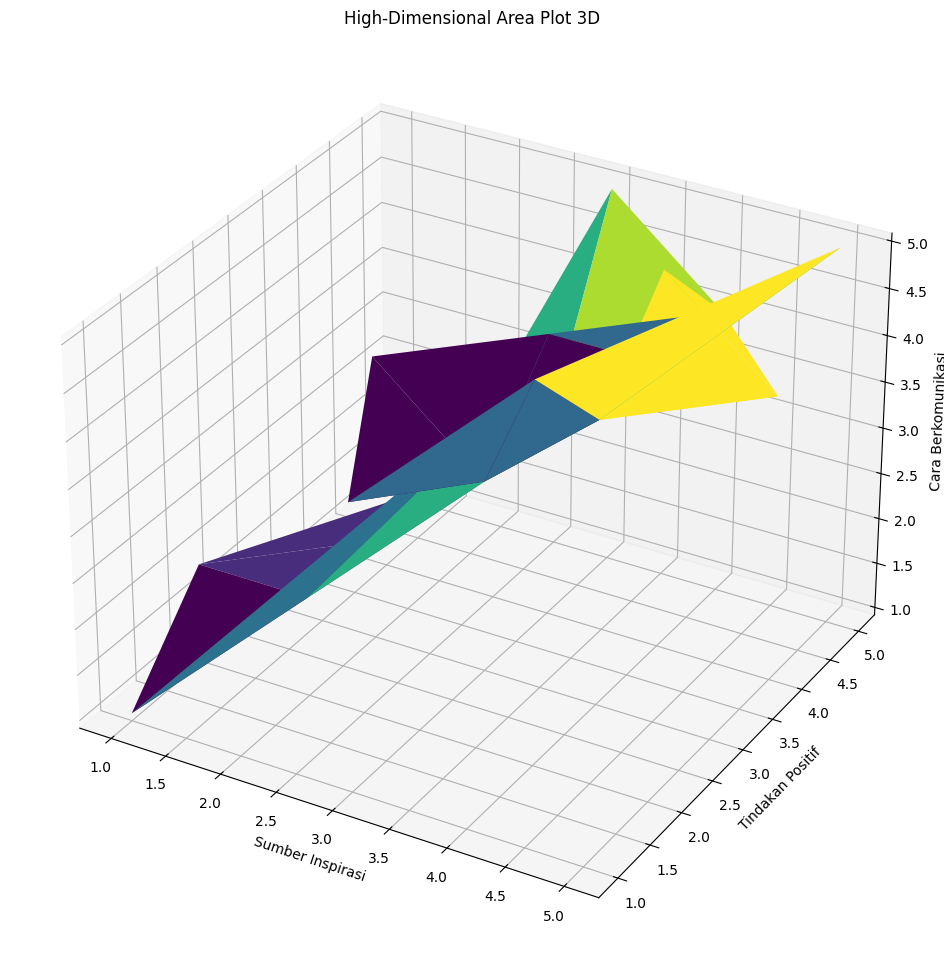

In [20]:
# High Dimensional Area Plot 3
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
# Membuat surface plot
surf_0 = ax.plot_trisurf(output_0['Seberapa besar anda merasa drama/movie dapat menjadi sumber inspirasi bagi anda untuk mengubah perilaku sehari-hari?'], output_0['Seberapa sering kamu merasa terinspirasi untuk melakukan tindakan positif setelah menonton drama/movie?'], output_0['Dengan menonton drama/movie, cara berkomunikasi Anda dengan orang lain terpengaruhi'], cmap='viridis')
surf_1 = ax.plot_trisurf(output_1['Seberapa besar anda merasa drama/movie dapat menjadi sumber inspirasi bagi anda untuk mengubah perilaku sehari-hari?'], output_1['Seberapa sering kamu merasa terinspirasi untuk melakukan tindakan positif setelah menonton drama/movie?'], output_1['Dengan menonton drama/movie, cara berkomunikasi Anda dengan orang lain terpengaruhi'], cmap='viridis')
# Menambahkan label
ax.set_xlabel('Sumber Inspirasi')
ax.set_ylabel('Tindakan Positif')
ax.set_zlabel('Cara Berkomunikasi')
ax.set_title('High-Dimensional Area Plot 3D')
plt.show()

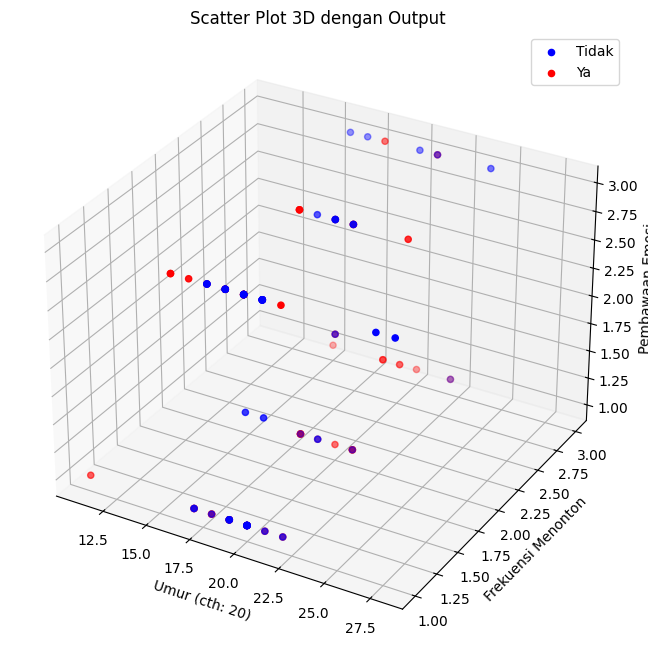

In [21]:
## SCATTER PLOT HIGH DIMENSIONAL
# Memisahkan data berdasarkan output
output_0 = df[df['Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?'] == 0]
output_1 = df[df['Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?'] == 1]


# High Dimensional Scatter Plot 1
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Menampilkan scatter plot untuk Output 0 (warna biru) dan Output 1 (warna merah)
ax.scatter(output_0['Umur (cth: 20)'], output_0['Frekuensi menonton drama/movie per Bulan'], output_0['Apakah saat menonton drama/movie, Anda selalu terbawa emosi? (Seperti sedih atau marah)'], c='blue', label='Tidak')
ax.scatter(output_1['Umur (cth: 20)'], output_1['Frekuensi menonton drama/movie per Bulan'], output_1['Apakah saat menonton drama/movie, Anda selalu terbawa emosi? (Seperti sedih atau marah)'], c='red', label='Ya')
ax.set_xlabel('Umur (cth: 20)')
ax.set_ylabel('Frekuensi Menonton')
ax.set_zlabel('Pembawaan Emosi')
ax.set_title('Scatter Plot 3D dengan Output')
plt.legend()
plt.show()

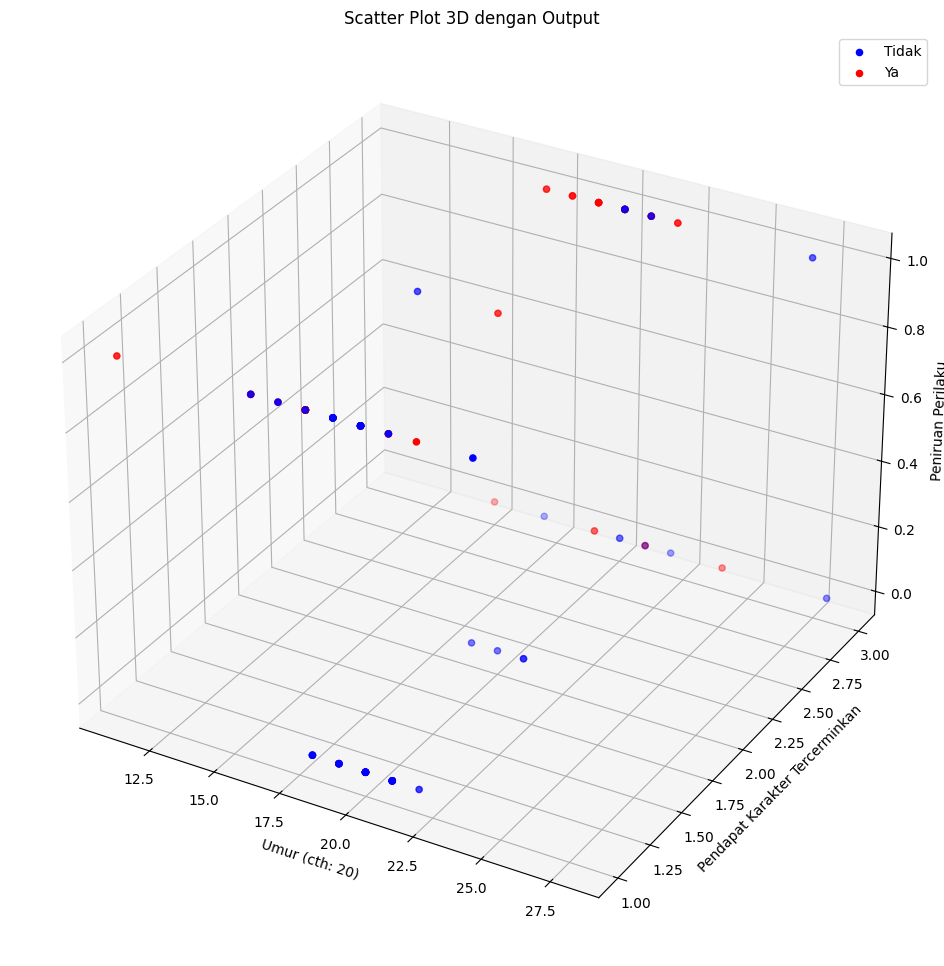

In [22]:
# High Dimensional Scatter Plot 2
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
# Menampilkan scatter plot untuk Output 0 (warna biru) dan Output 1 (warna merah)
ax.scatter(output_0['Umur (cth: 20)'], output_0['Menurut Anda, apakah karakter dan keadaan dalam drama/movie tercerminkan di kehidupan nyata?'], output_0['Apakah setelah melihat drama/movie, Anda pernah mencoba untuk menirukan perilaku atau kebiasan karakter dalam drama/movie tersebut di kehidupan sehari-hari?'], c='blue', label='Tidak')
ax.scatter(output_1['Umur (cth: 20)'], output_1['Menurut Anda, apakah karakter dan keadaan dalam drama/movie tercerminkan di kehidupan nyata?'], output_1['Apakah setelah melihat drama/movie, Anda pernah mencoba untuk menirukan perilaku atau kebiasan karakter dalam drama/movie tersebut di kehidupan sehari-hari?'], c='red', label='Ya')
ax.set_xlabel('Umur (cth: 20)')
ax.set_ylabel('Pendapat Karakter Tercerminkan')
ax.set_zlabel('Peniruan Perilaku')
ax.set_title('Scatter Plot 3D dengan Output')
plt.legend()
plt.show()

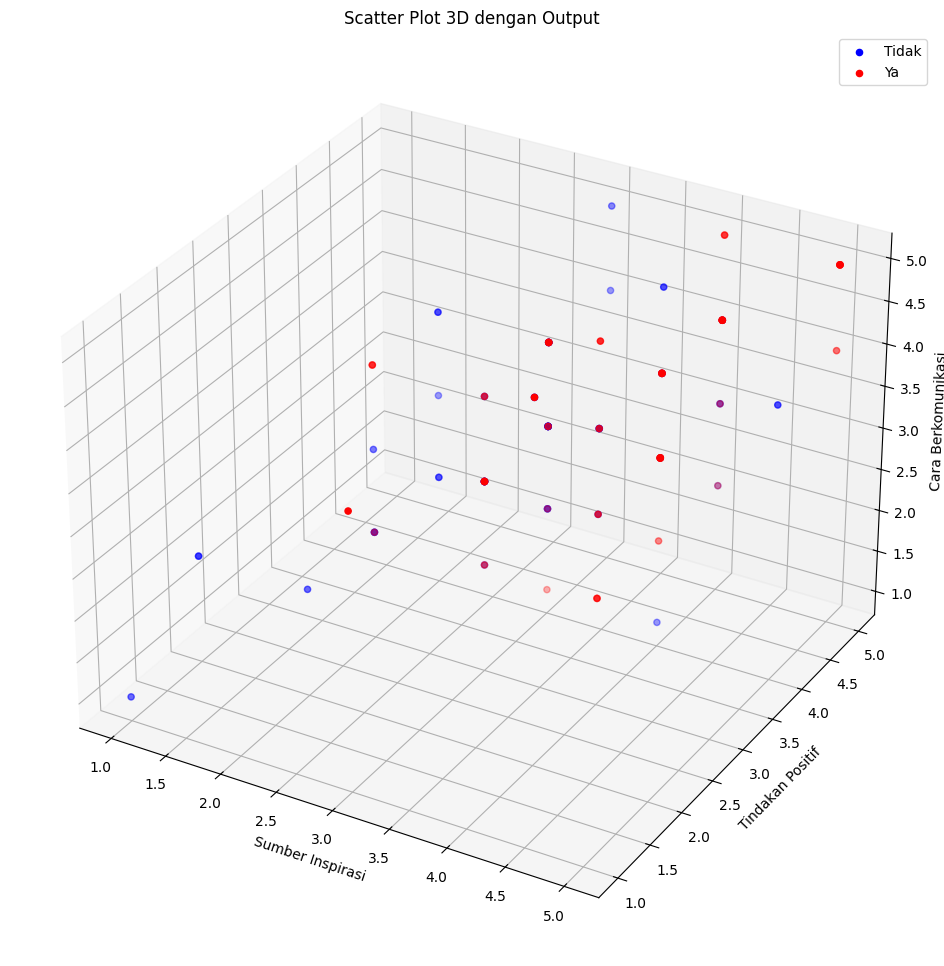

In [23]:
# High Dimensional Scatter Plot 3
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
# Menampilkan scatter plot untuk Output 0 (warna biru) dan Output 1 (warna merah)
ax.scatter(output_0['Seberapa besar anda merasa drama/movie dapat menjadi sumber inspirasi bagi anda untuk mengubah perilaku sehari-hari?'], output_0['Seberapa sering kamu merasa terinspirasi untuk melakukan tindakan positif setelah menonton drama/movie?'], output_0['Dengan menonton drama/movie, cara berkomunikasi Anda dengan orang lain terpengaruhi'], c='blue', label='Tidak')
ax.scatter(output_1['Seberapa besar anda merasa drama/movie dapat menjadi sumber inspirasi bagi anda untuk mengubah perilaku sehari-hari?'], output_1['Seberapa sering kamu merasa terinspirasi untuk melakukan tindakan positif setelah menonton drama/movie?'], output_1['Dengan menonton drama/movie, cara berkomunikasi Anda dengan orang lain terpengaruhi'], c='red', label='Ya')
ax.set_xlabel('Sumber Inspirasi')
ax.set_ylabel('Tindakan Positif')
ax.set_zlabel('Cara Berkomunikasi')
ax.set_title('Scatter Plot 3D dengan Output')
plt.legend()
plt.show()

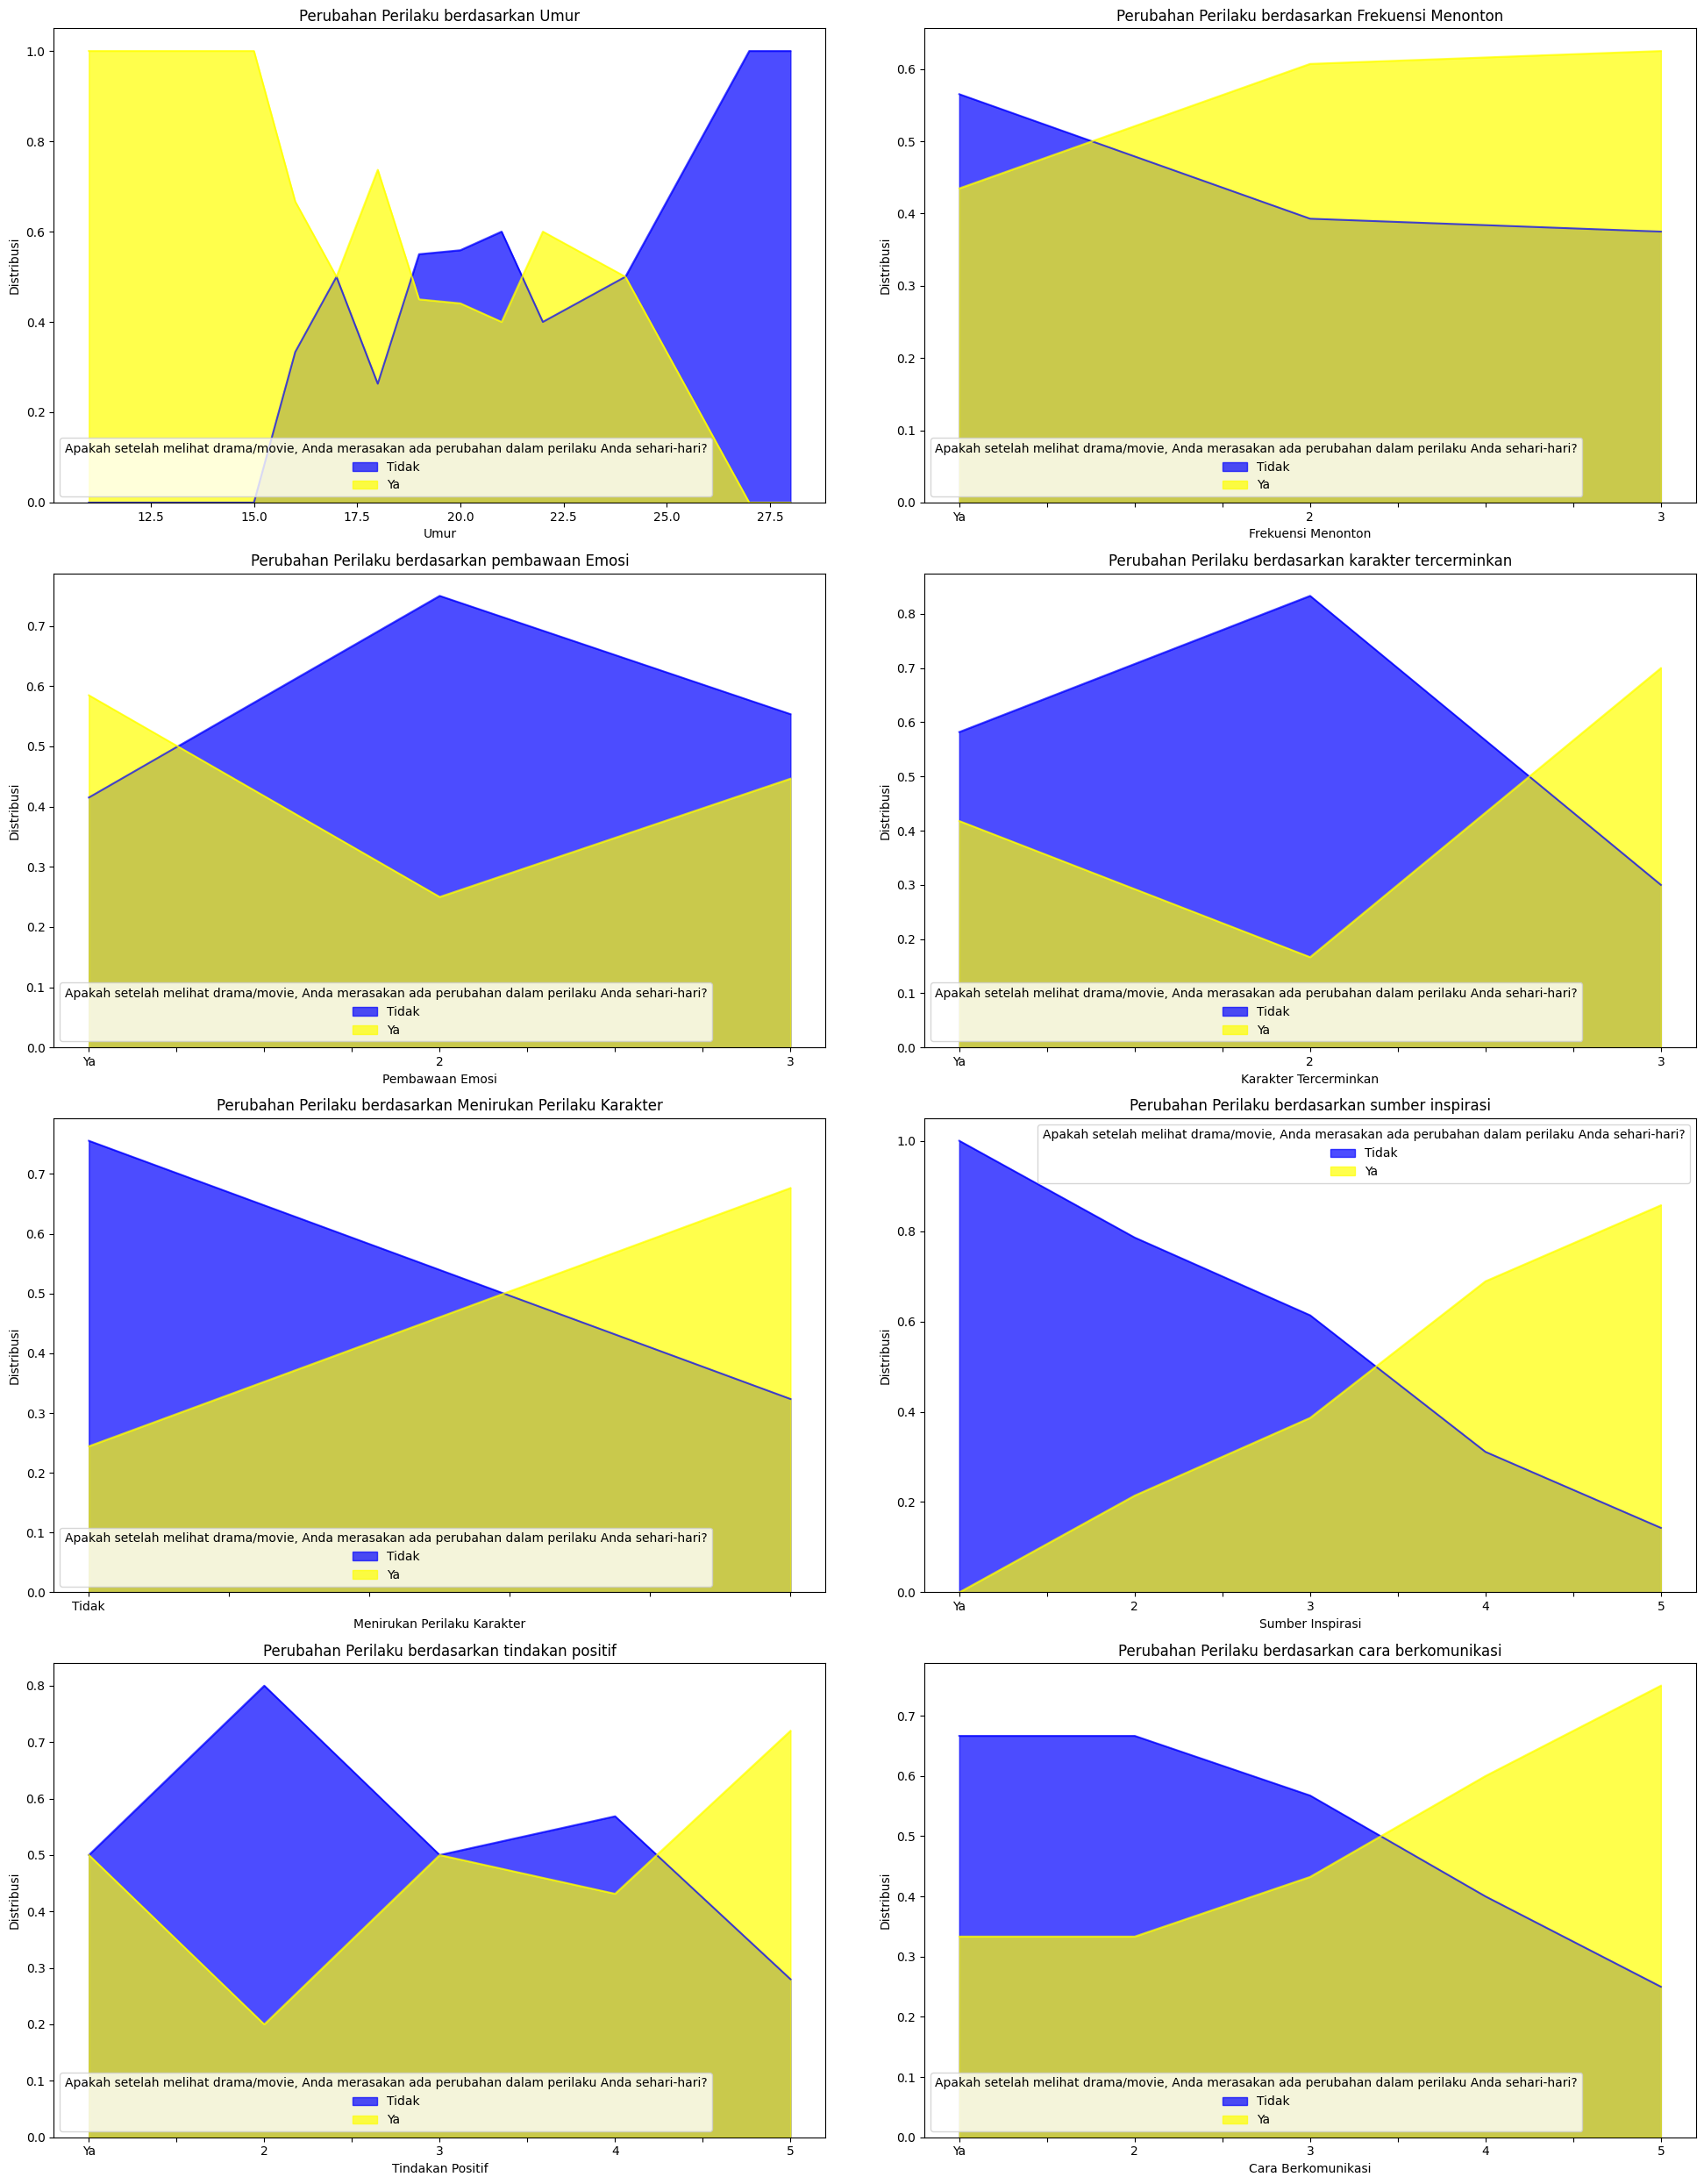

In [24]:
import matplotlib.pyplot as plt

# Set up subplots
fig, axs = plt.subplots(4, 2, figsize=(20, 25))
# Define label mapping
label_mapping = {0: 'Tidak', 1: 'Ya'}

# Area Plot 1
area1 = df.groupby('Umur (cth: 20)')['Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?'].value_counts(normalize=True).unstack().fillna(0)
area1.rename(columns=label_mapping, index=label_mapping, inplace=True)
colors = ['blue', 'yellow']
area1.plot(kind='area', stacked=False, color=colors, alpha=0.7, ax=axs[0, 0])
axs[0, 0].set_title('Perubahan Perilaku berdasarkan Umur')
axs[0, 0].set_xlabel('Umur')
axs[0, 0].set_ylabel('Distribusi')

# Area Plot 2
area2 = df.groupby('Frekuensi menonton drama/movie per Bulan')['Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?'].value_counts(normalize=True).unstack().fillna(0)
area2.rename(columns=label_mapping, index=label_mapping, inplace=True)
area2.plot(kind='area', stacked=False, color=colors, alpha=0.7, ax=axs[0, 1])
axs[0, 1].set_title('Perubahan Perilaku berdasarkan Frekuensi Menonton')
axs[0, 1].set_xlabel('Frekuensi Menonton')
axs[0, 1].set_ylabel('Distribusi')

# Area Plot 3
area3 = df.groupby('Apakah saat menonton drama/movie, Anda selalu terbawa emosi? (Seperti sedih atau marah)')['Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?'].value_counts(normalize=True).unstack().fillna(0)
area3.rename(columns=label_mapping, index=label_mapping, inplace=True)
area3.plot(kind='area', stacked=False, color=colors, alpha=0.7, ax=axs[1, 0])
axs[1, 0].set_title('Perubahan Perilaku berdasarkan pembawaan Emosi')
axs[1, 0].set_xlabel('Pembawaan Emosi')
axs[1, 0].set_ylabel('Distribusi')

# Area Plot 4
area4 = df.groupby('Menurut Anda, apakah karakter dan keadaan dalam drama/movie tercerminkan di kehidupan nyata?')['Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?'].value_counts(normalize=True).unstack().fillna(0)
area4.rename(columns=label_mapping, index=label_mapping, inplace=True)
area4.plot(kind='area', stacked=False, color=colors, alpha=0.7, ax=axs[1, 1])
axs[1, 1].set_title('Perubahan Perilaku berdasarkan karakter tercerminkan')
axs[1, 1].set_xlabel('Karakter Tercerminkan')
axs[1, 1].set_ylabel('Distribusi')

# Area Plot 5
area5 = df.groupby('Apakah setelah melihat drama/movie, Anda pernah mencoba untuk menirukan perilaku atau kebiasan karakter dalam drama/movie tersebut di kehidupan sehari-hari?')['Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?'].value_counts(normalize=True).unstack().fillna(0)
area5.rename(columns=label_mapping, index=label_mapping, inplace=True)
area5.plot(kind='area', stacked=False, color=colors, alpha=0.7, ax=axs[2, 0])
axs[2, 0].set_title('Perubahan Perilaku berdasarkan Menirukan Perilaku Karakter')
axs[2, 0].set_xlabel('Menirukan Perilaku Karakter')
axs[2, 0].set_ylabel('Distribusi')

# Area Plot 6
area6 = df.groupby('Seberapa besar anda merasa drama/movie dapat menjadi sumber inspirasi bagi anda untuk mengubah perilaku sehari-hari?')['Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?'].value_counts(normalize=True).unstack().fillna(0)
area6.rename(columns=label_mapping, index=label_mapping, inplace=True)
area6.plot(kind='area', stacked=False, color=colors, alpha=0.7, ax=axs[2, 1])
axs[2, 1].set_title('Perubahan Perilaku berdasarkan sumber inspirasi')
axs[2, 1].set_xlabel('Sumber Inspirasi')
axs[2, 1].set_ylabel('Distribusi')

# Area Plot 7
area7 = df.groupby('Seberapa sering kamu merasa terinspirasi untuk melakukan tindakan positif setelah menonton drama/movie?')['Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?'].value_counts(normalize=True).unstack().fillna(0)
area7.rename(columns=label_mapping, index=label_mapping, inplace=True)
area7.plot(kind='area', stacked=False, color=colors, alpha=0.7, ax=axs[3, 0])
axs[3, 0].set_title('Perubahan Perilaku berdasarkan tindakan positif')
axs[3, 0].set_xlabel('Tindakan Positif')
axs[3, 0].set_ylabel('Distribusi')

# Area Plot 8
area8 = df.groupby('Dengan menonton drama/movie, cara berkomunikasi Anda dengan orang lain terpengaruhi')['Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?'].value_counts(normalize=True).unstack().fillna(0)
area8.rename(columns=label_mapping, index=label_mapping, inplace=True)
area8.plot(kind='area', stacked=False, color=colors, alpha=0.7, ax=axs[3, 1])
axs[3, 1].set_title('Perubahan Perilaku berdasarkan cara berkomunikasi')
axs[3, 1].set_xlabel('Cara Berkomunikasi')
axs[3, 1].set_ylabel('Distribusi')

# Adjust layout
plt.tight_layout()
plt.show()


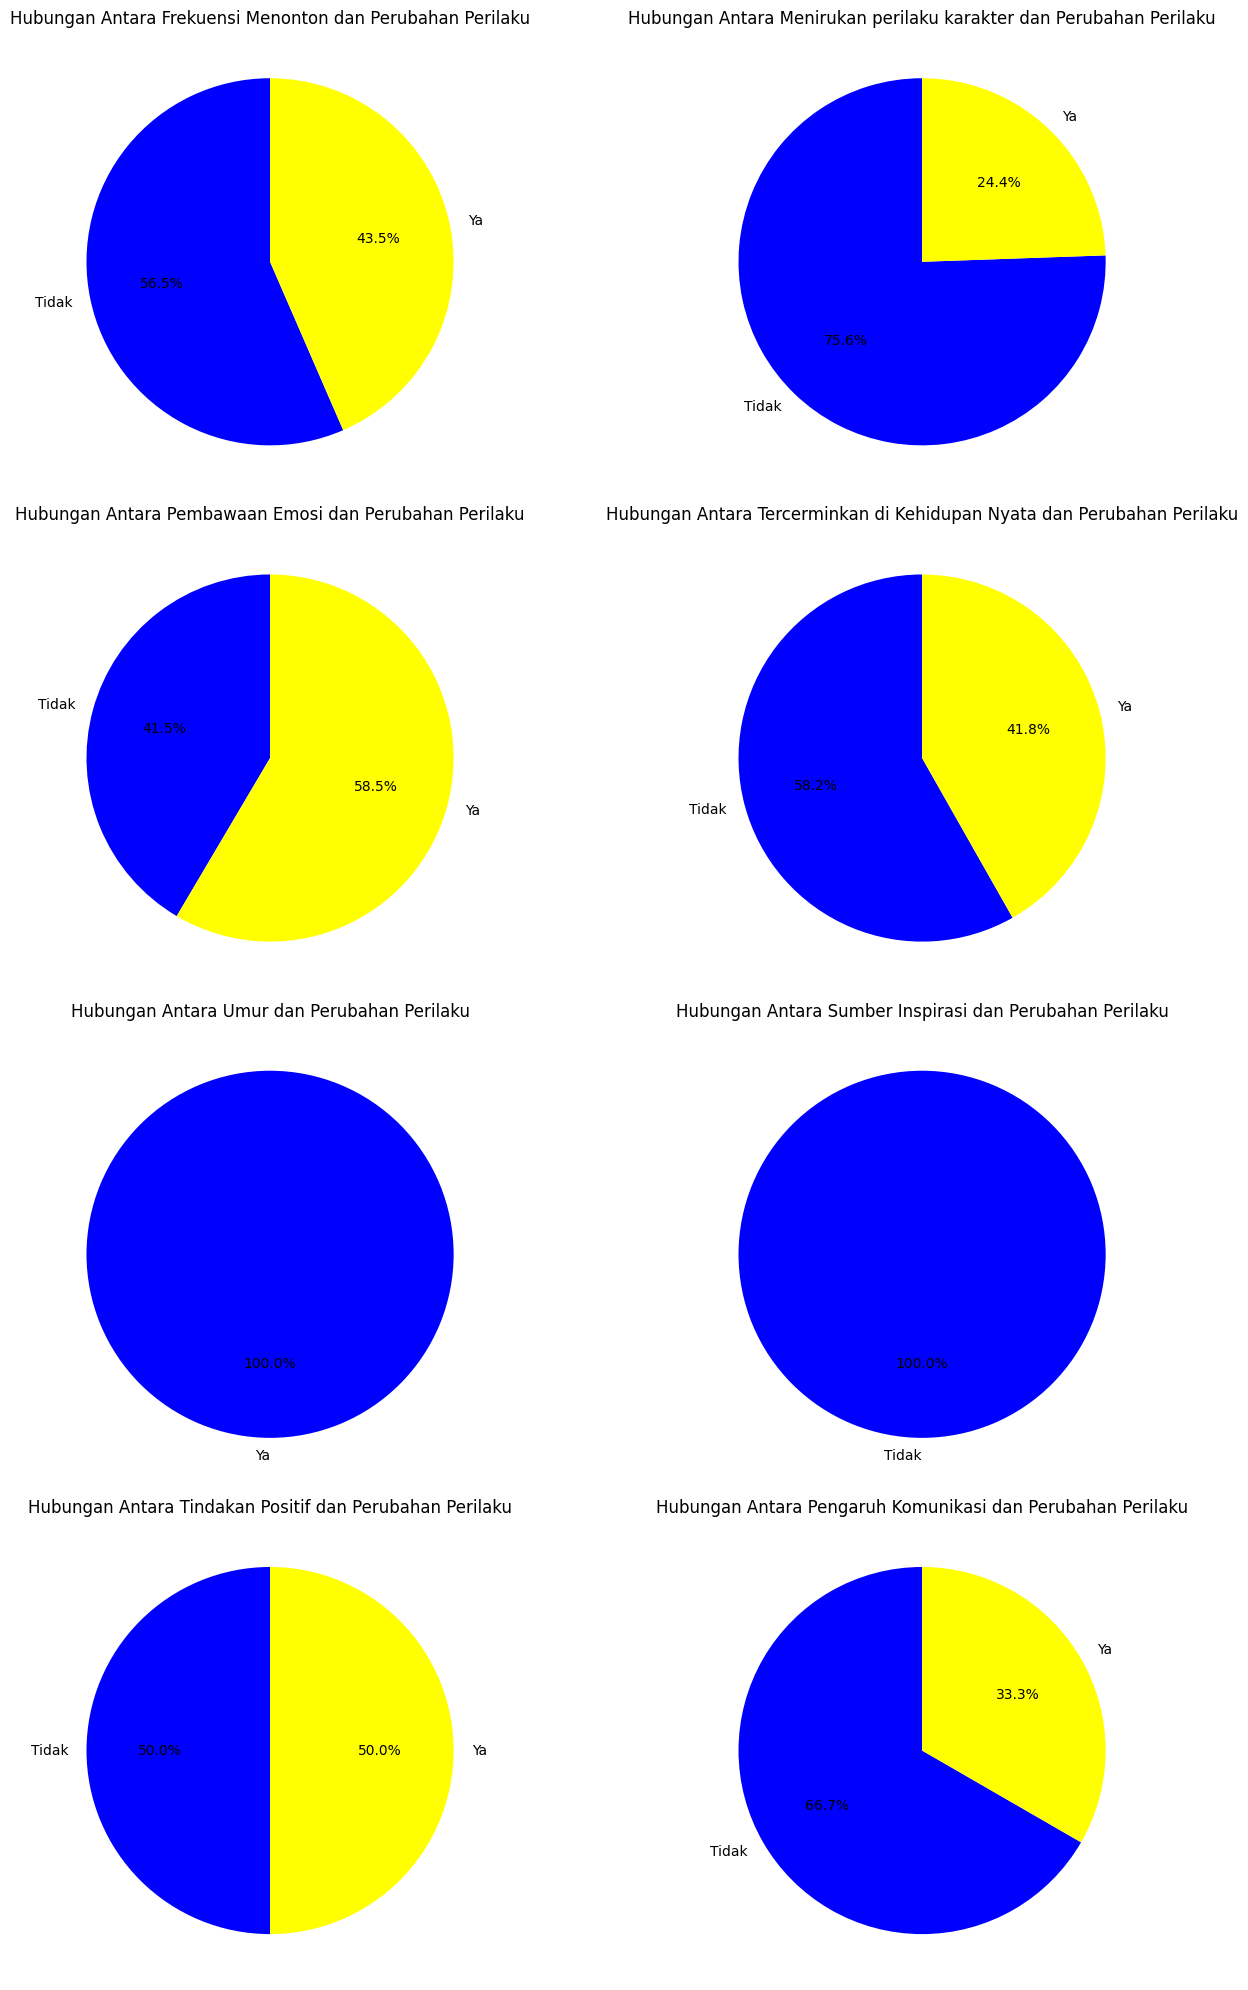

In [25]:
import matplotlib.pyplot as plt

# Function to plot pie chart
def plot_pie_chart(data, ax, title):
    # Drop NaN values
    data = data.dropna()
    # Map labels using the label_mapping
    labels = data.index.map(label_mapping).tolist()
    ax.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, colors=['blue', 'yellow'])
    ax.set_title(title)

# Mapping for labels
label_mapping = {0: 'Tidak', 1: 'Ya'}

# Set up subplots
fig, axs = plt.subplots(4, 2, figsize=(15, 20))

# Diagram 1 (Frekuensi menonton tiap bulan dan Perubahan Perilaku)
data = df.groupby(['Frekuensi menonton drama/movie per Bulan', 'Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?']).size().unstack()
plot_pie_chart(data.iloc[0], axs[0, 0], 'Hubungan Antara Frekuensi Menonton dan Perubahan Perilaku')

# Diagram 2 (Menirukan perilaku dan kebiasaan dan Perubahan Perilaku)
data = df.groupby(['Apakah setelah melihat drama/movie, Anda pernah mencoba untuk menirukan perilaku atau kebiasan karakter dalam drama/movie tersebut di kehidupan sehari-hari?', 'Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?']).size().unstack()
plot_pie_chart(data.iloc[0], axs[0, 1], 'Hubungan Antara Menirukan perilaku karakter dan Perubahan Perilaku')

# Diagram 3 (Pembawaan Emosi dan Perubahan Perilaku)
data = df.groupby(['Apakah saat menonton drama/movie, Anda selalu terbawa emosi? (Seperti sedih atau marah)', 'Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?']).size().unstack()
plot_pie_chart(data.iloc[0], axs[1, 0], 'Hubungan Antara Pembawaan Emosi dan Perubahan Perilaku')

# Diagram 4 (Karakter Tercerminkan dan Perubahan Perilaku)
data = df.groupby(['Menurut Anda, apakah karakter dan keadaan dalam drama/movie tercerminkan di kehidupan nyata?', 'Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?']).size().unstack()
plot_pie_chart(data.iloc[0], axs[1, 1], 'Hubungan Antara Tercerminkan di Kehidupan Nyata dan Perubahan Perilaku')

# Diagram 5 (Umur dan Perubahan Perilaku)
data = df.groupby(['Umur (cth: 20)', 'Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?']).size().unstack()
plot_pie_chart(data.iloc[0], axs[2, 0], 'Hubungan Antara Umur dan Perubahan Perilaku')

# Diagram 6 (Sumber Inspirasi dan Perubahan Perilaku)
data = df.groupby(['Seberapa besar anda merasa drama/movie dapat menjadi sumber inspirasi bagi anda untuk mengubah perilaku sehari-hari?', 'Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?']).size().unstack()
plot_pie_chart(data.iloc[0], axs[2, 1], 'Hubungan Antara Sumber Inspirasi dan Perubahan Perilaku')

# Diagram 7 (Tindakan Positif dan Perubahan Perilaku)
data = df.groupby(['Seberapa sering kamu merasa terinspirasi untuk melakukan tindakan positif setelah menonton drama/movie?', 'Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?']).size().unstack()
plot_pie_chart(data.iloc[0], axs[3, 0], 'Hubungan Antara Tindakan Positif dan Perubahan Perilaku')

# Diagram 8 (Pengaruh Komunikasi dan Perubahan Perilaku)
data = df.groupby(['Dengan menonton drama/movie, cara berkomunikasi Anda dengan orang lain terpengaruhi', 'Apakah setelah melihat drama/movie, Anda merasakan ada perubahan dalam perilaku Anda sehari-hari?']).size().unstack()
plot_pie_chart(data.iloc[0], axs[3, 1], 'Hubungan Antara Pengaruh Komunikasi dan Perubahan Perilaku')

# Adjust layout
plt.tight_layout()
plt.show()
